In [ ]:
#----------------------------------THIS IS THE UPDATED MAIN VERSION USED FOR FINAL WRITEUP RESULTS-------------------------------------------
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from PyPDF2 import PdfMerger
import csv
import lineid_plot
import matplotlib.patches as mpatches
# import pandas as pd

#smoothing function definition

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def map_DEG_to_RA(deg_list):
    RA_list=[]
    coord=0
    for i in range(0,len(deg_list)):
        hour= (deg_list[i]//1)*(1/15) #get the integer part of the float degree value and convert to hours. (1/15 hours per degree)
        minute= (hour-hour//1)*4.0 #decimal part of the degree float converted to minutes (4 minutes per degree)
        second= (minute-minute//1)*60 #decimal part of the minute coordinate, converted to seconds coordinate (60 sec per minute)
        coord=hour//1+(minute//1)/100+((second//1)//1)/10000
        RA_list.append(coord)
    return(RA_list)

def pickles_Plot(PName):
    with open('uvi_data.csv') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
    #         print(row)
            dat=fits.open(str(row[0]))
            if(str(row[0])==PName):

                #sort the names and spectral types using delimiter
                name=row[0][0:-5]
                SpecT=row[1]

                #Get the header info and curve data
                hdr = dat[0].header
                data=dat[1].data
                s1=[]

                wav=[]
                for i in range(540,1655):
                    s1.append(data[i][1])
                    wav.append(data[i][0])
#                     print(i,data[i][0])
#                 print(s1)

                s1max=max(s1)
                for i in range(0,len(s1)):
                    s1[i]=s1[i]/s1max


                plt.plot(wav, s1, label="Pickles type "+str(SpecT), linewidth=0.9, color="teal")
        #         break
    f.close()
    


In [20]:
print(map_DEG_to_RA([22.2565,23]))

[1.0151000000000001, 1.0207]


0
ZZ_GDB1.fits


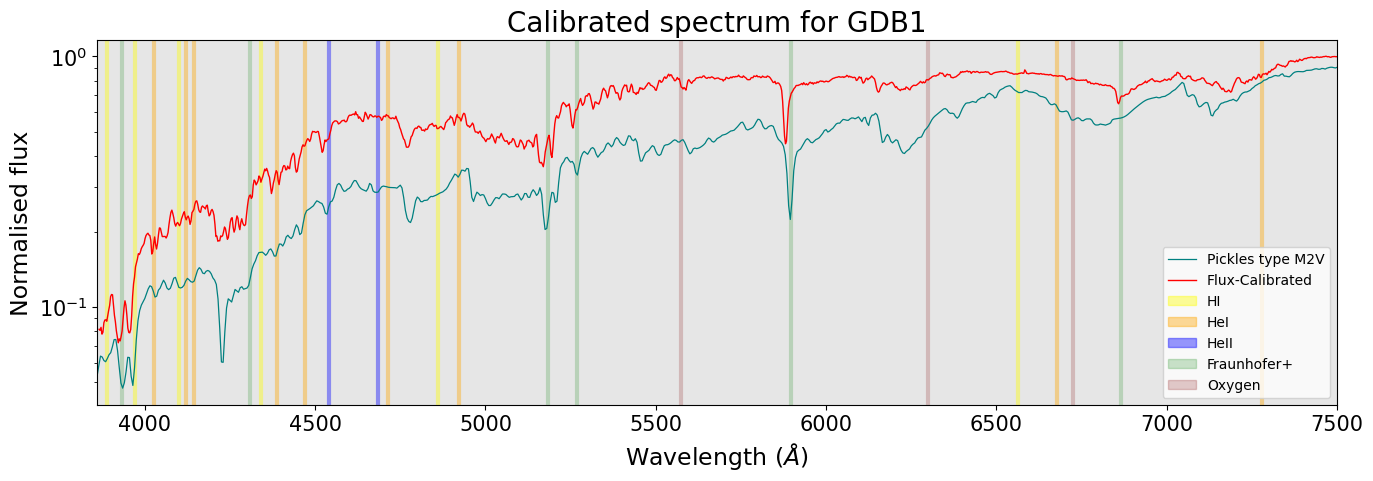

1
ZZ_GDB2.fits


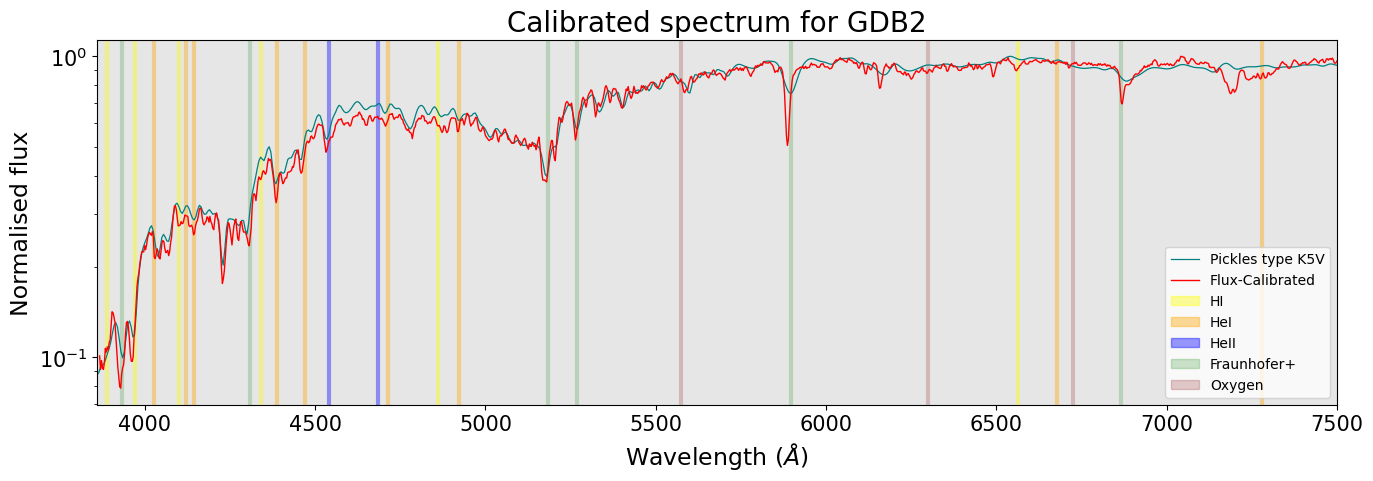

2
ZZ_GDB3.fits


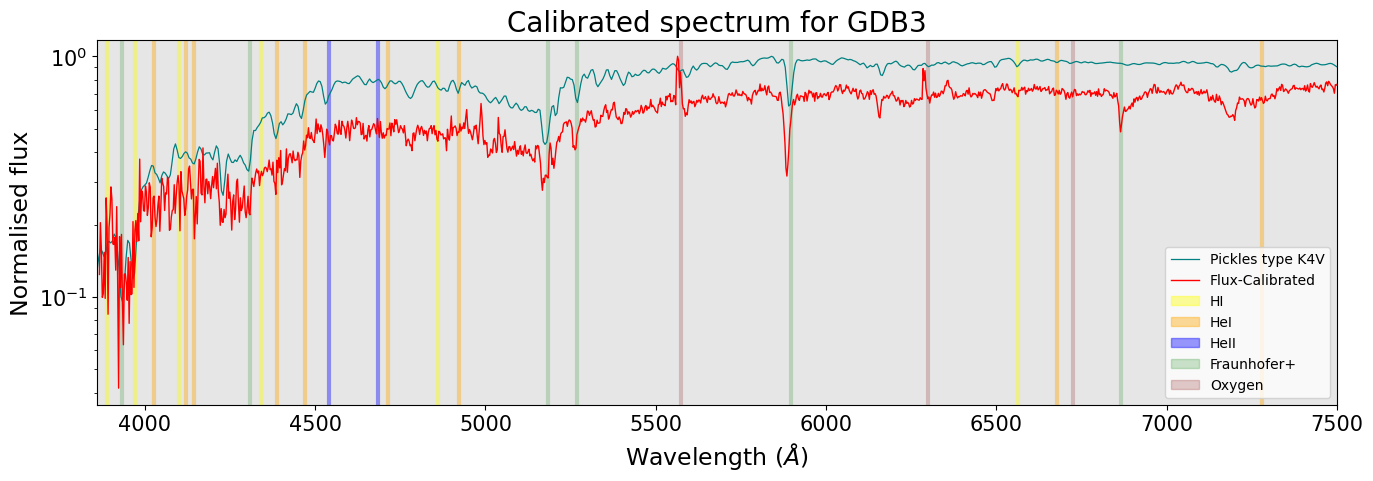

3
ZZ_GDB4.fits


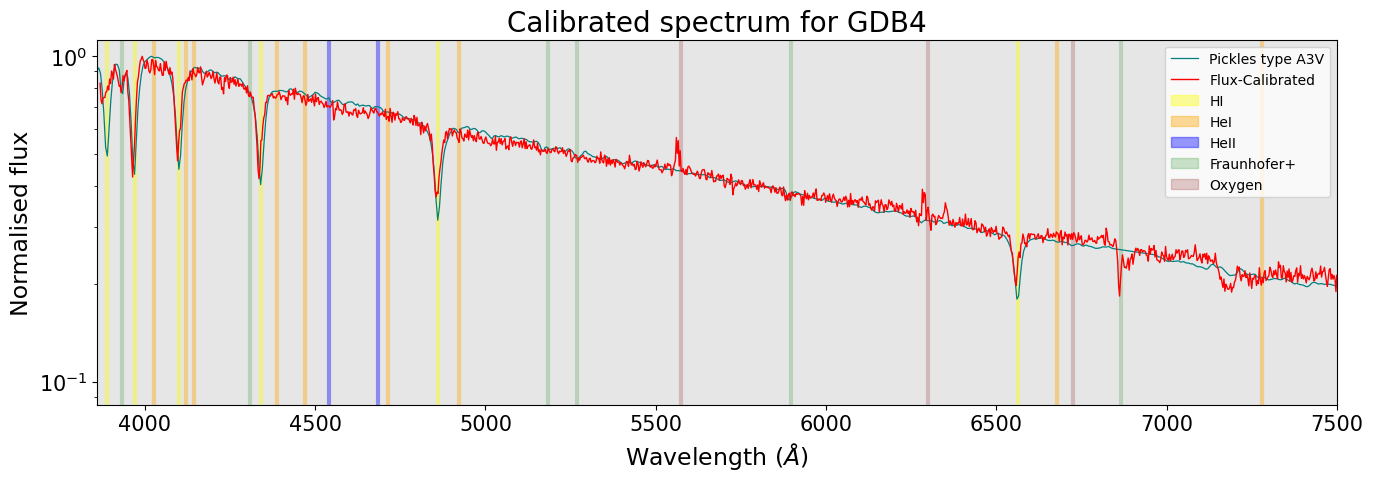

4
ZZ_GDB5.fits


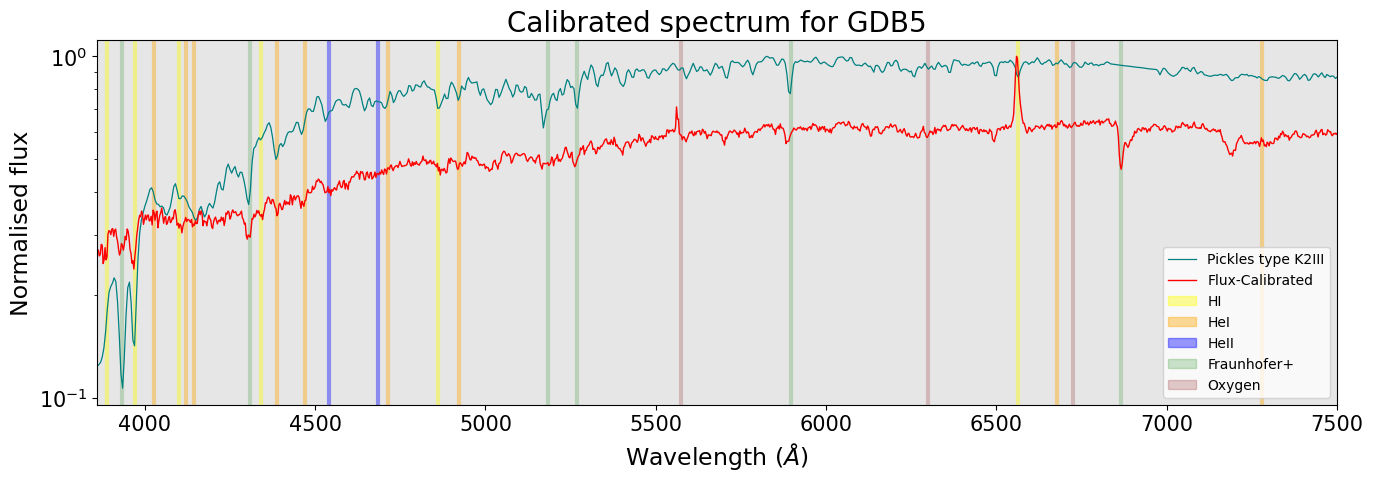

5
ZZ_GDB6.fits


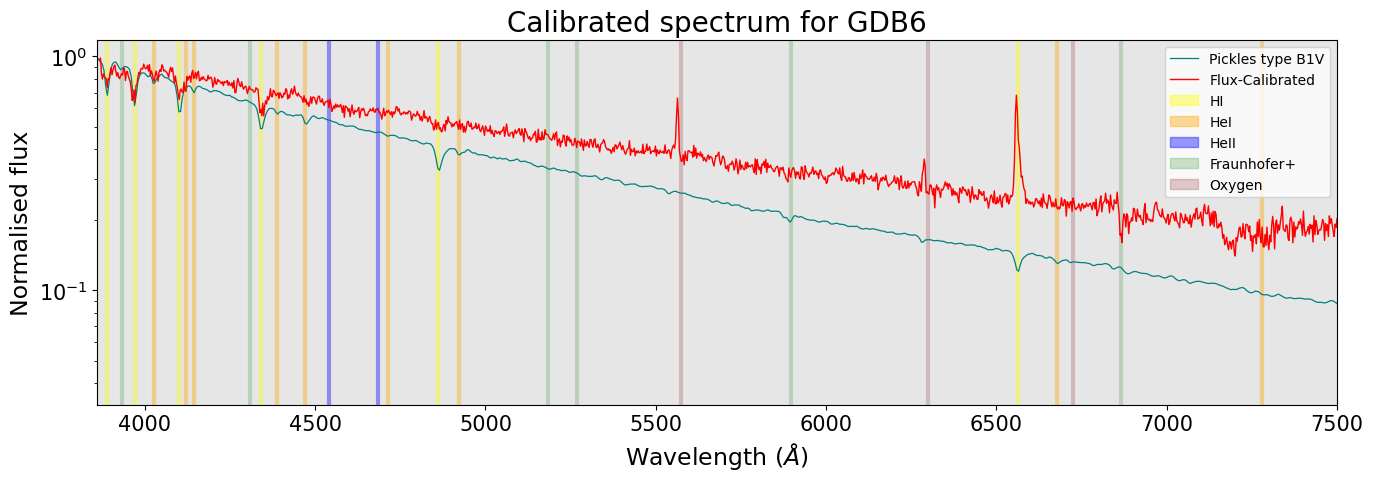

6
ZZ_GDB7.fits


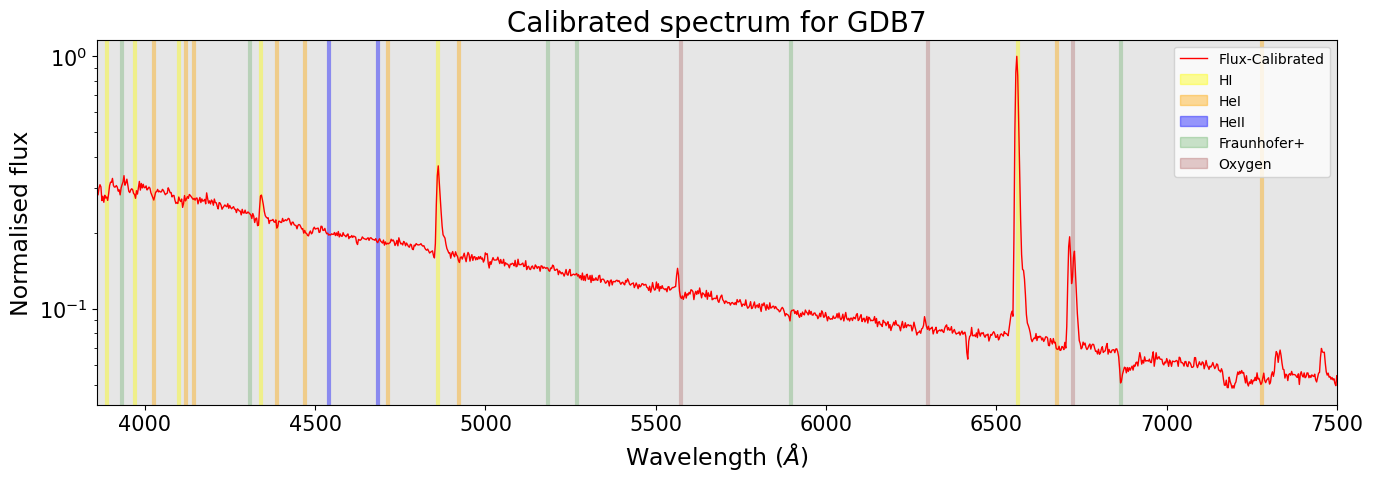

7
ZZ_GDB8.fits


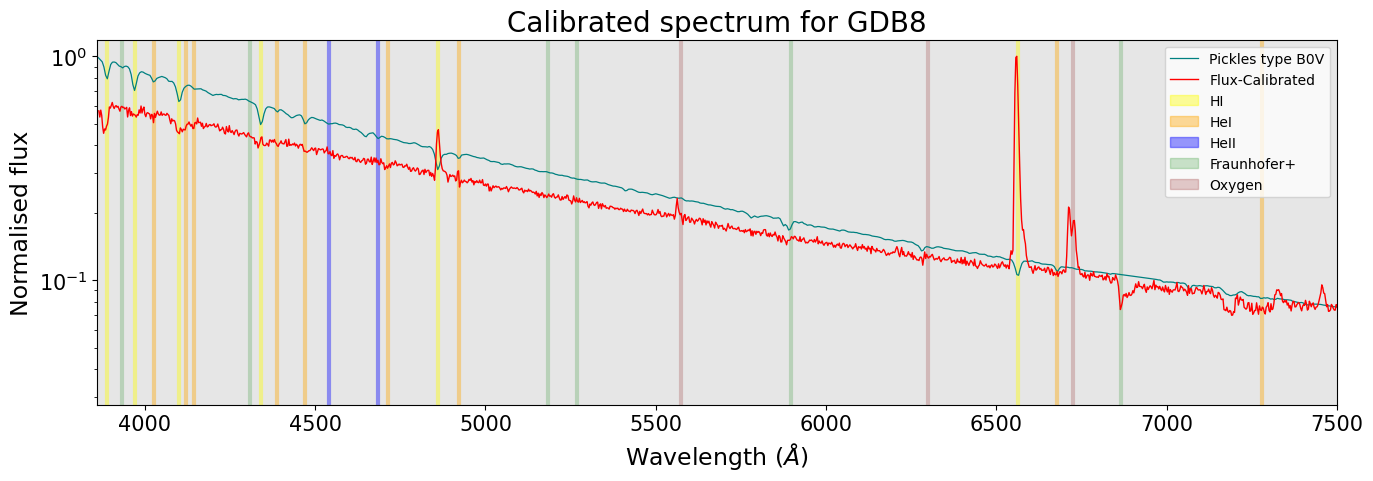

8
ZZ_GDB9.fits


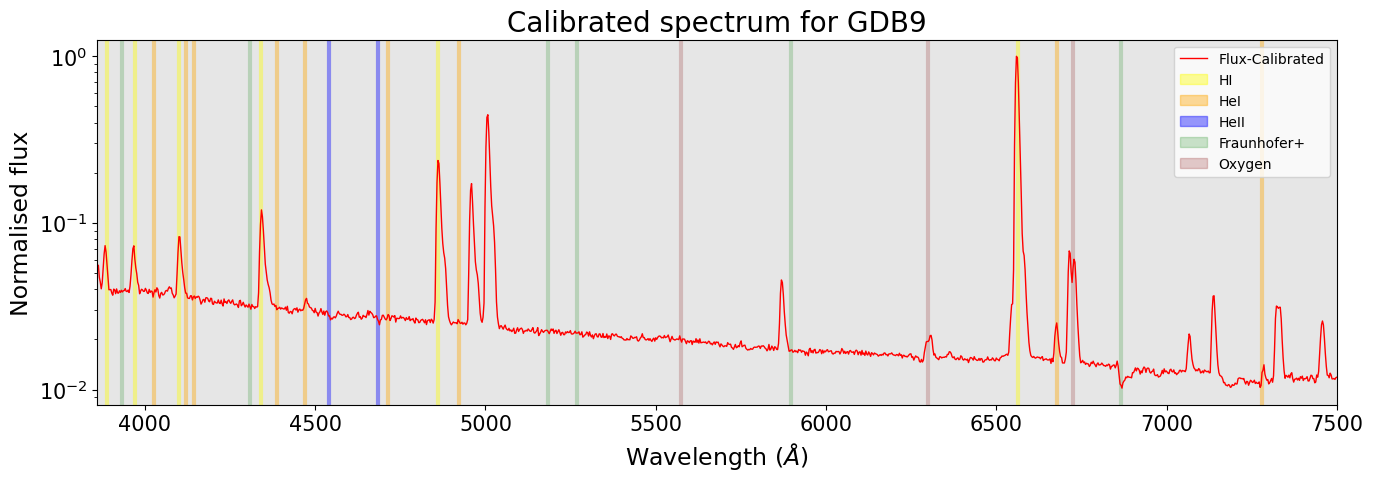

9
ZZ_GDB10.fits


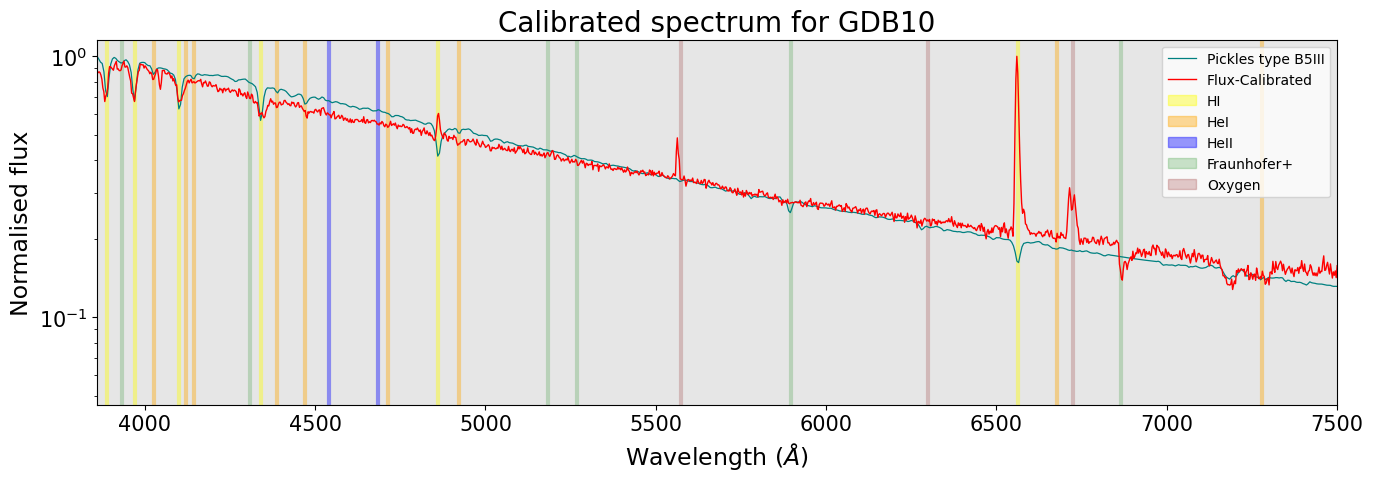

10
ZZ_GDB13.fits


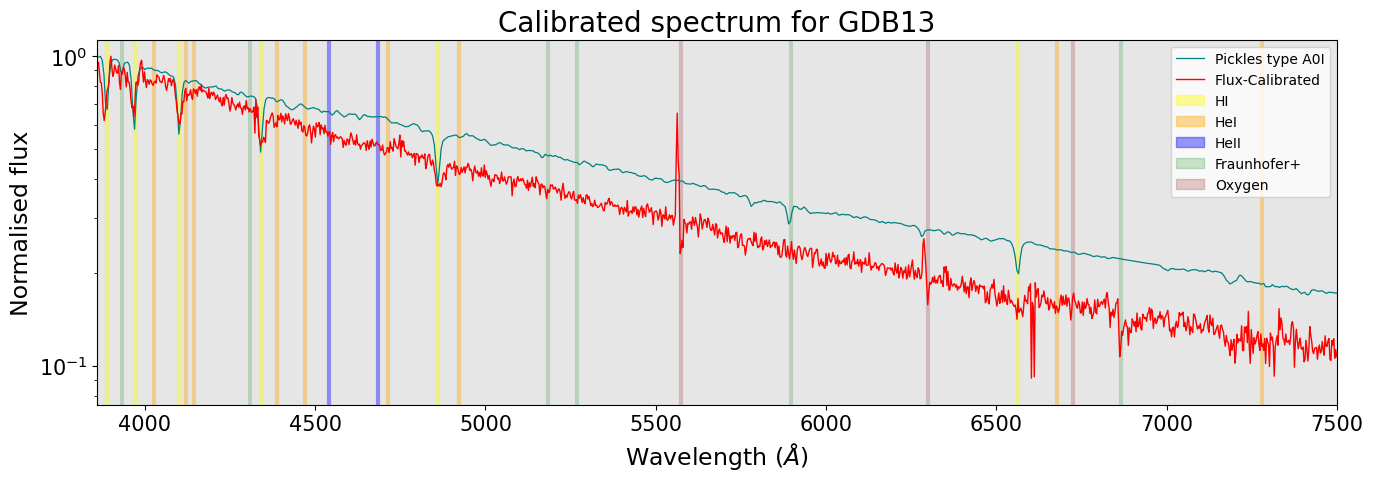

11
ZZ_GDB14.fits


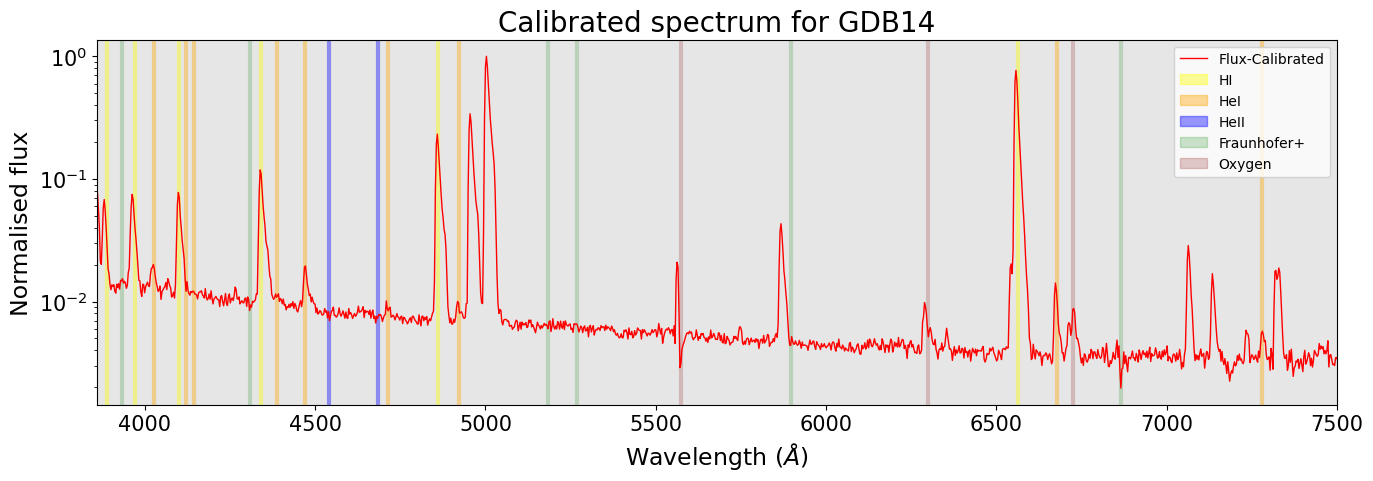

12
ZZ_GDB21.fits


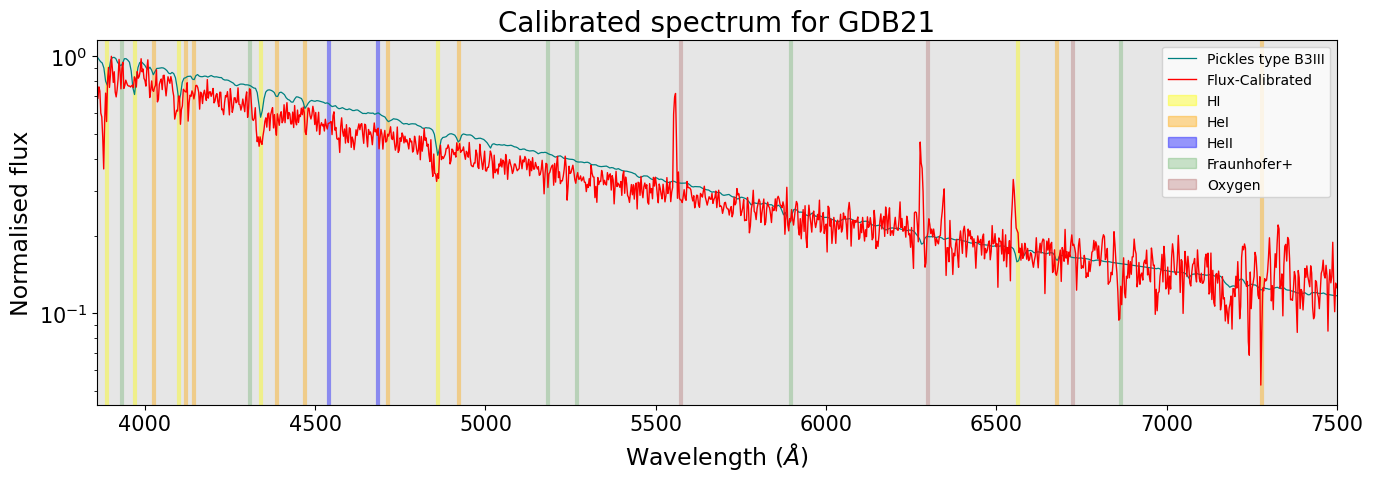

13
ZZ_GDB23.fits


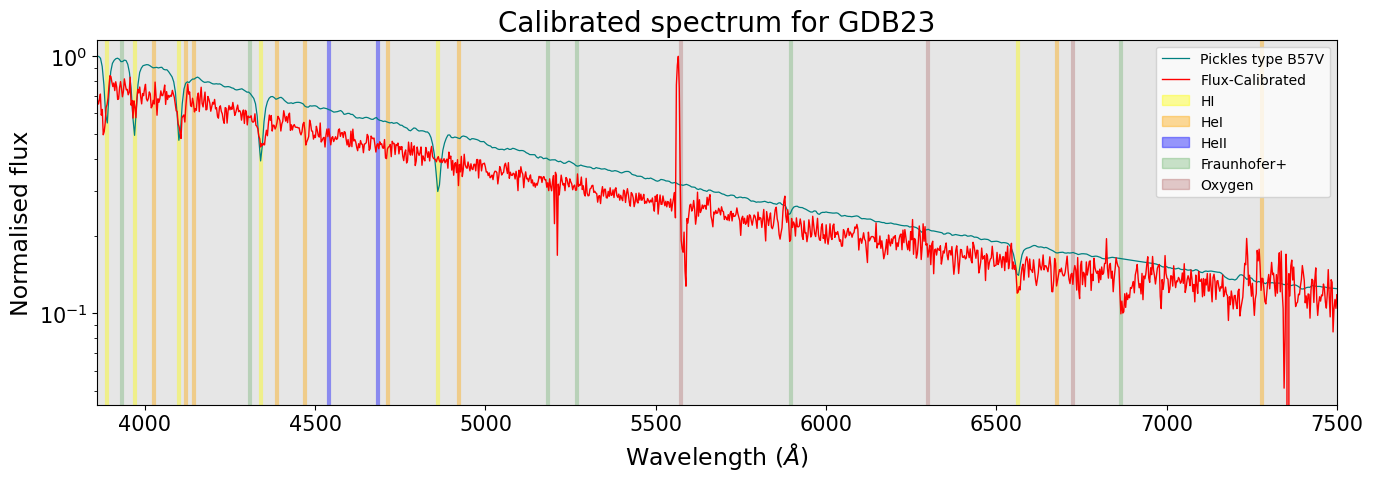

14
ZZ_GDB25.fits


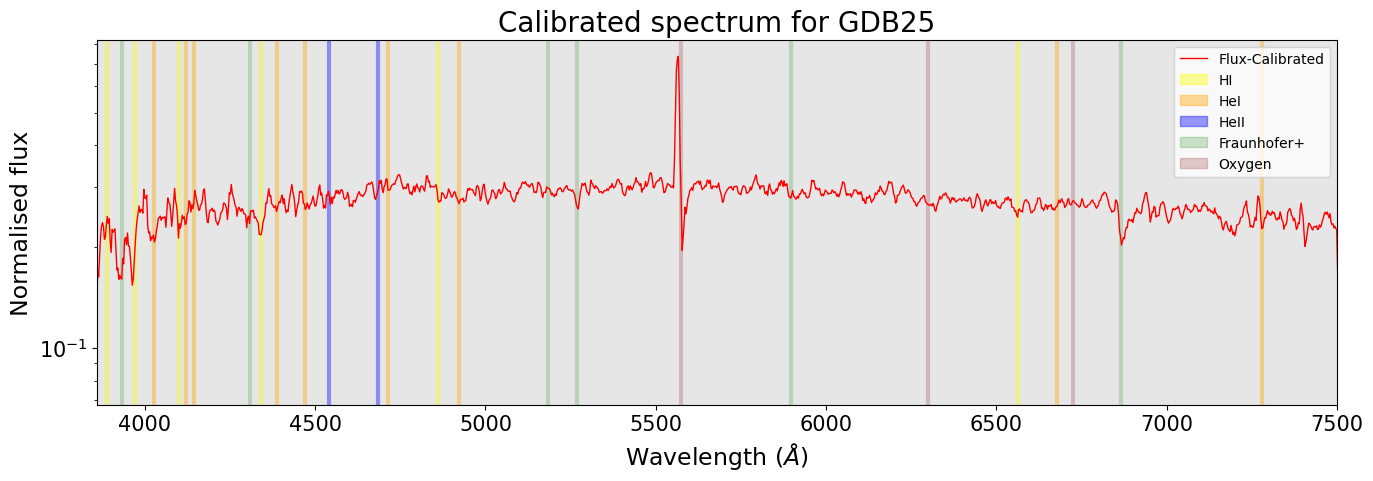

15
ZZ_GDB27.fits


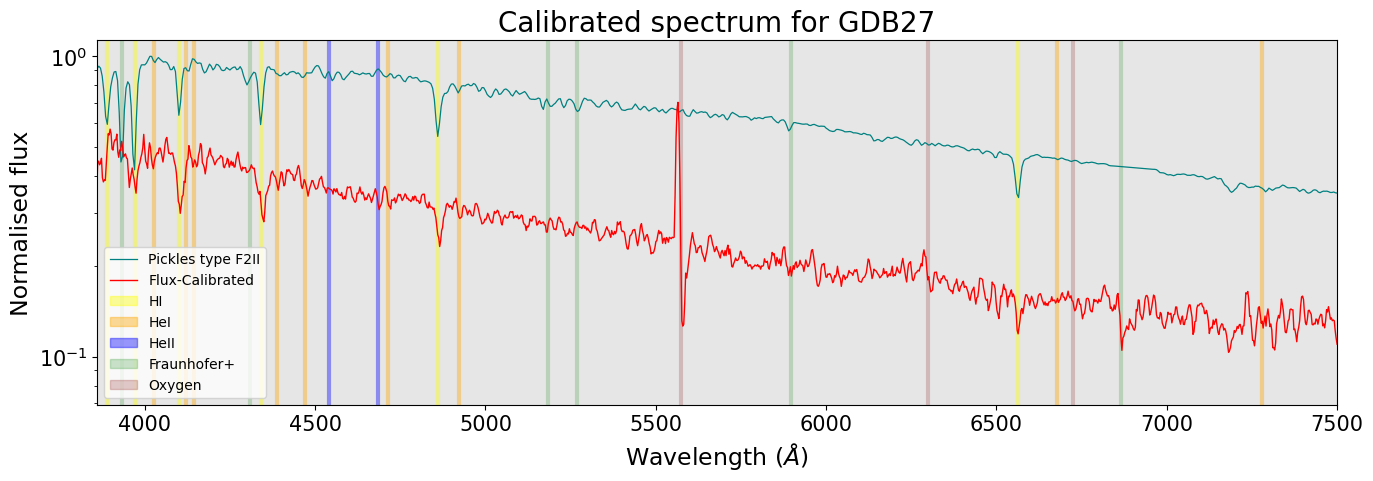

16
ZZ_GDB30.fits


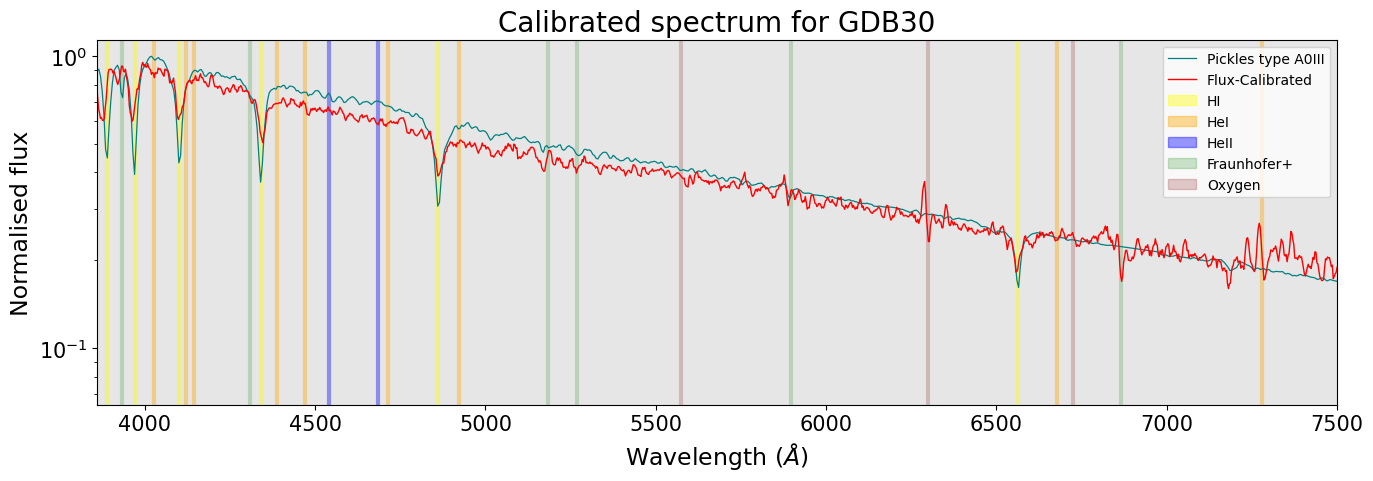

17
ZZ_GDB32.fits


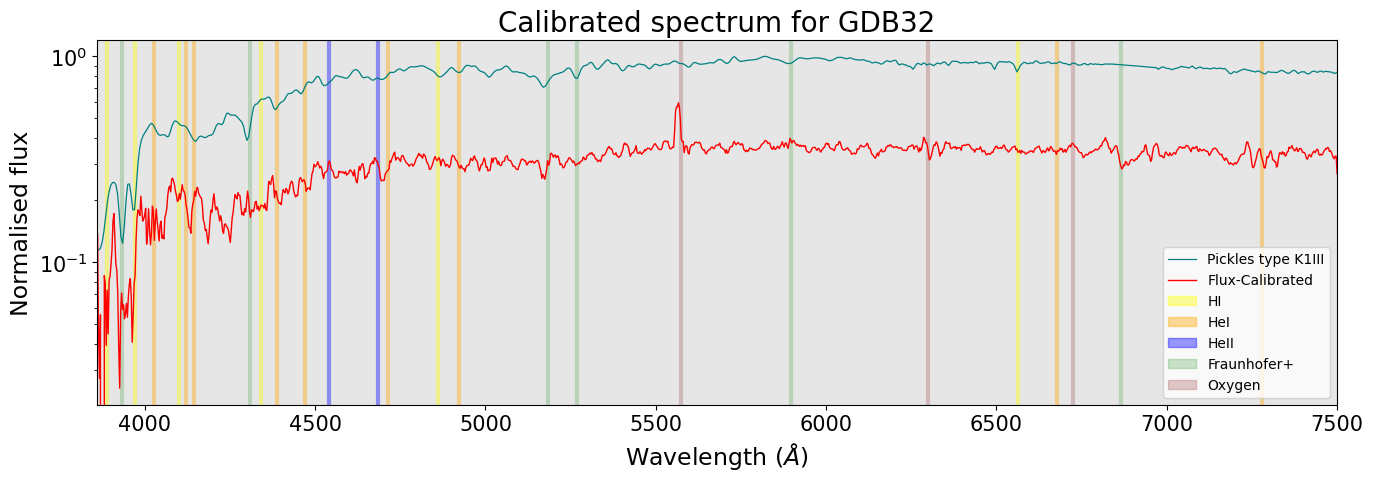

18
ZZ_GDB34.fits


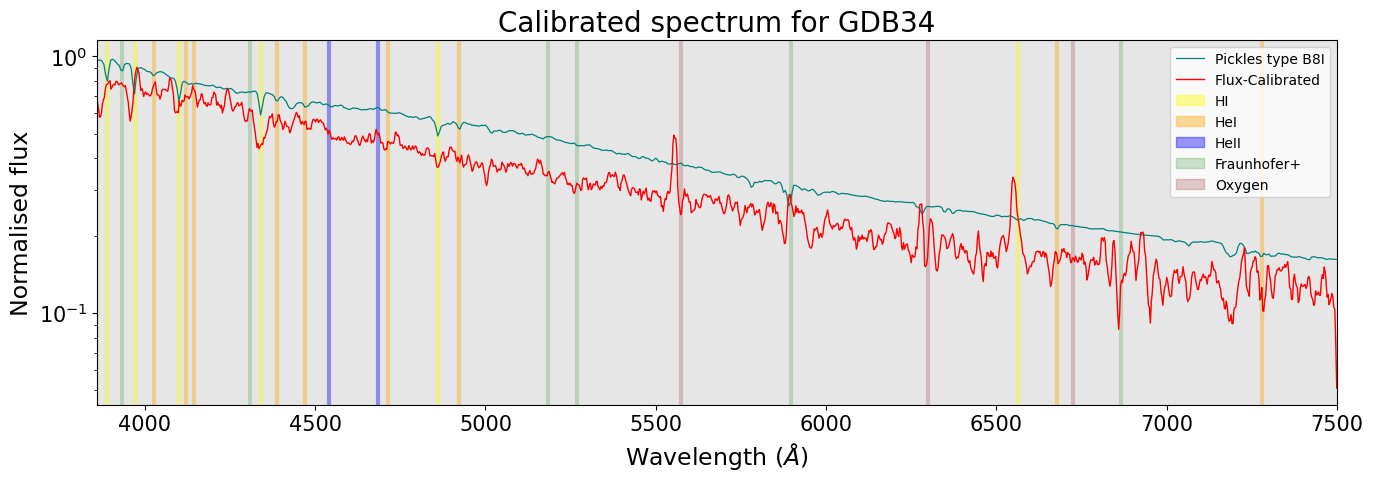

19
ZZ_GDB37.fits


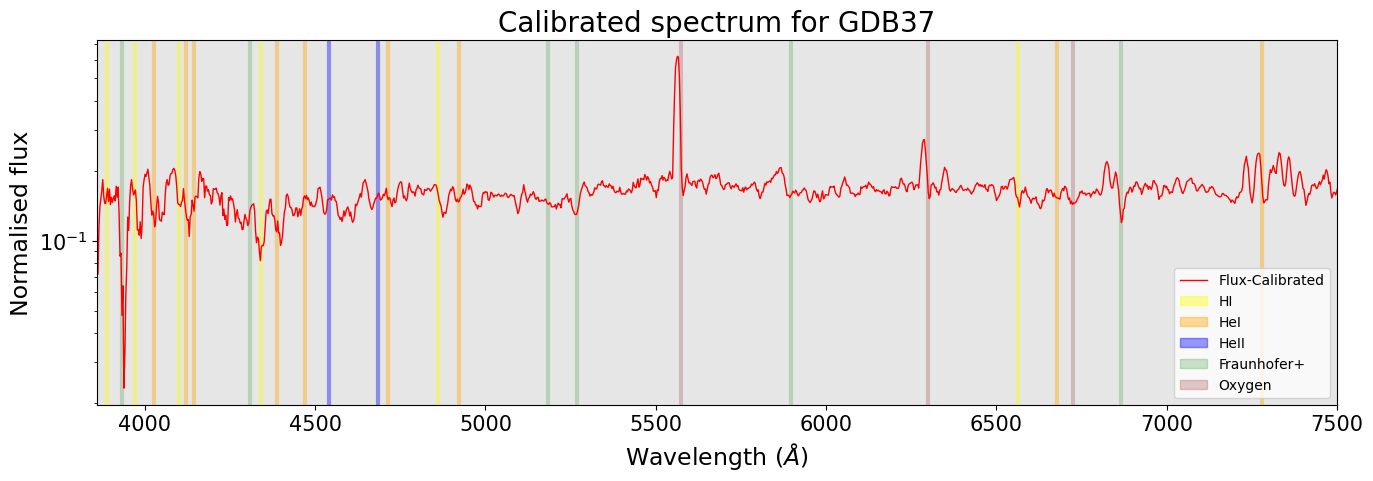

20
ZZ_GDB38.fits


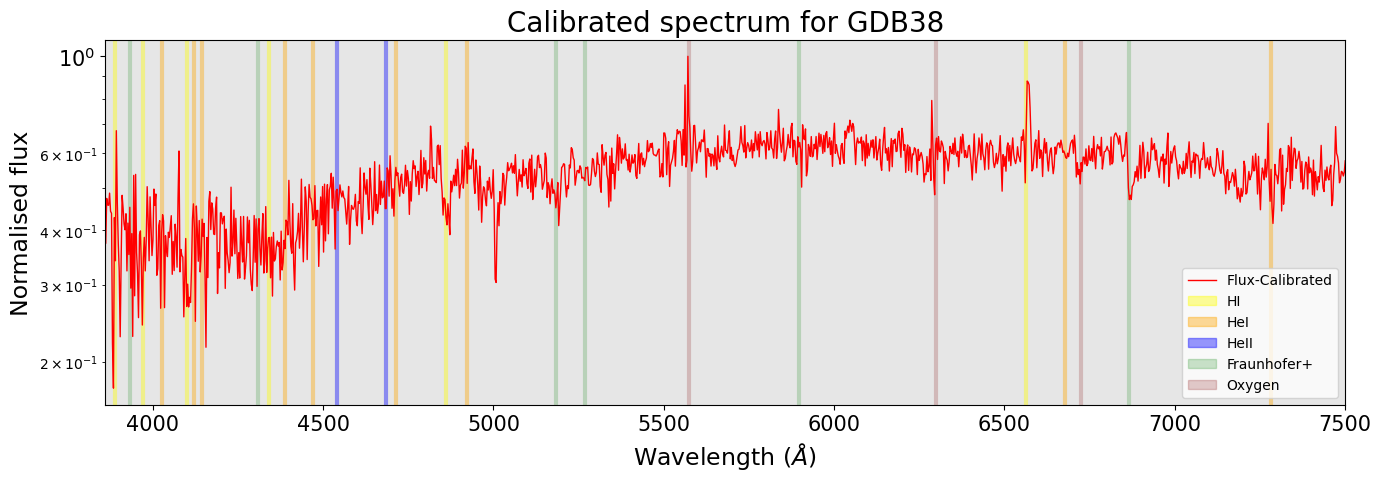

21
ZZ_GDB40.fits


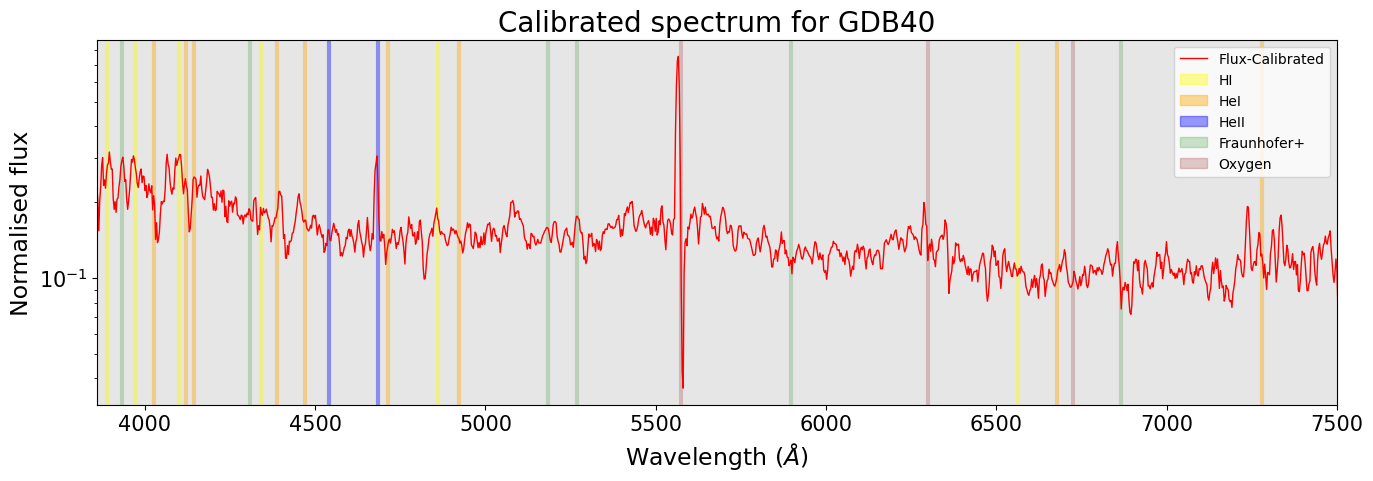

22
ZZ_GDB41.fits


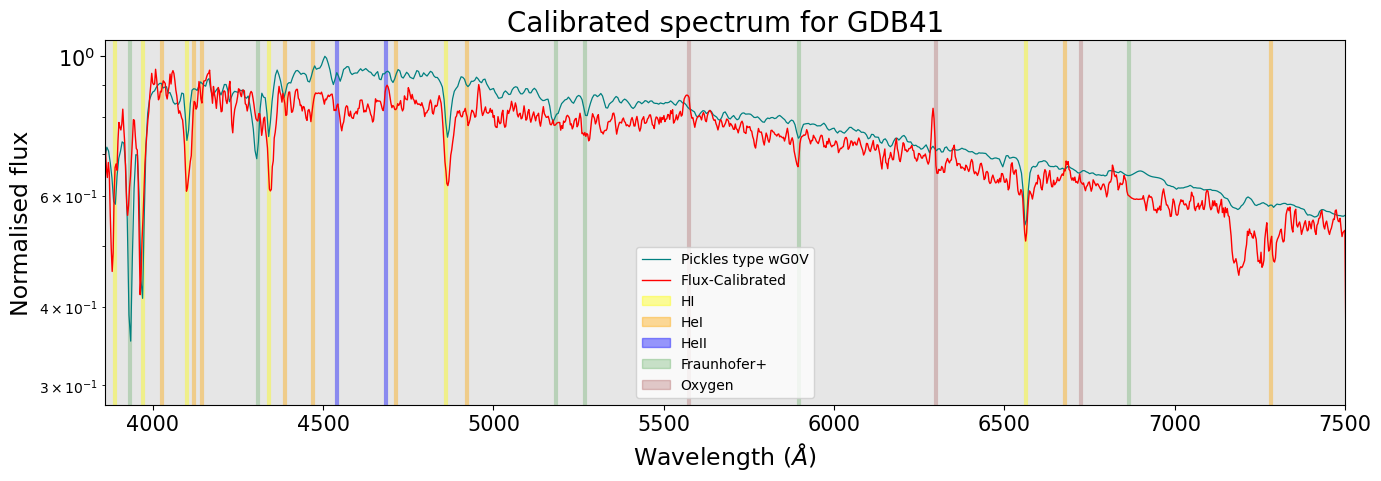

23
ZZ_LTT1020_21112023.fits


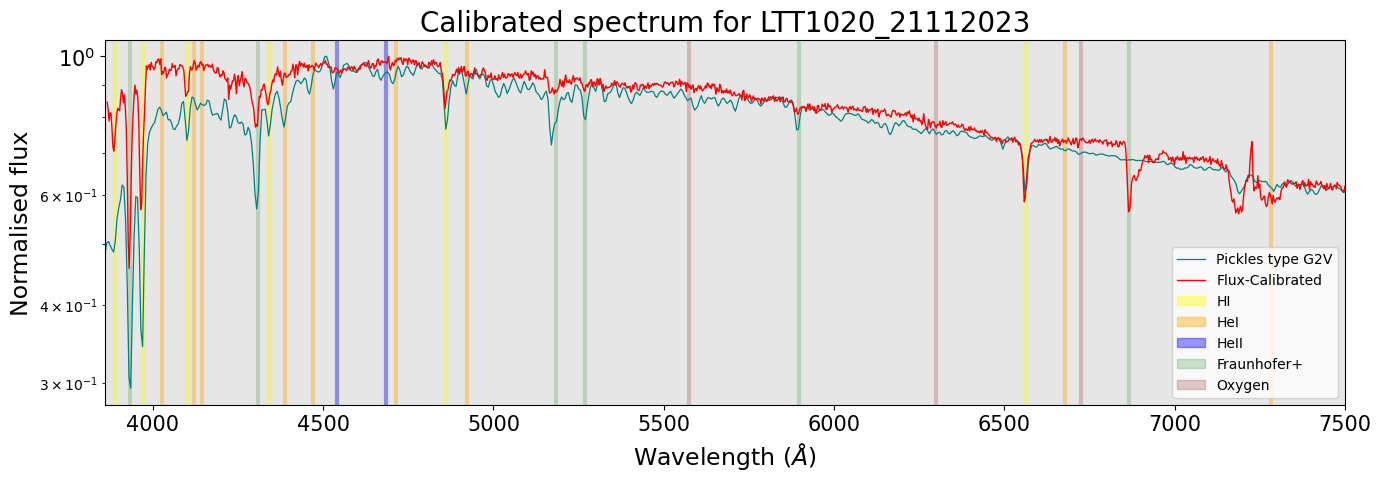

merges happened



In [ ]:


#Get the pdf merger ready for later
merger = PdfMerger()
Merge_files=[]

# Load data from CSV for the line locations to identify HI, HeI and HeII with
f_lines=open("Be_line_list(copy).txt", "r")

Be_name= []
Be_line= []
Be_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    Be_name.append(row_data[0])
    Be_line.append(float(row_data[1]))
    Be_color.append(row_data[2])
# print(Be_name,Be_line)
f_lines.close()

# Load data from CSV for the Fraunhofer lines
f_lines=open("Be_Fraunhofer_line_list.txt", "r")

FH_name= []
FH_line= []
FH_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    FH_name.append(row_data[0])
    FH_line.append(float(row_data[1]))
    FH_color.append(row_data[2])
# print(FH_name,FH_line)
f_lines.close()

f = open("all.csv", "r")
f_c = open("My_cal_files.csv", "r")
f_a = open("Arc_compare.csv", "r")

# Instantiate lists for file names of unclaibrated (files) and calibrated (files_cali) files.
files=[]
files_cali=[]
files_arc=[]

# Read first line for files and populate list
line=f.readline()
# print(f.readline())
while line!='':
    files.append(line[0:-1])
    line=f.readline()
#     print(line)
f.close()

# Read first line for files_cali and populate list
line=f_c.readline()
Smooth_Fac=[]
pickles_Match=[]
pickles_Type=[]
label_Y=[]
while line!='':
    row_data = line.strip("\n").split(',')
    
    files_cali.append(row_data[0])
    Smooth_Fac.append(row_data[1])
    pickles_Match.append(row_data[2])
    pickles_Type.append(row_data[3])
    label_Y.append(row_data[4])
    line=f_c.readline()
#     print(line)
f_c.close()

line=f_a.readline()
# print(f_a.readline())
while line!='':
    files_arc.append(line[0:-1])
    line=f_a.readline()
#     print(line)
f_a.close()

###########This is for the arc comparison with arcs that have been wavelength calibrated by 20231121/a5231077,
# comment out if not needed.##################

# plt.figure(figsize=(16, 9))
# plt.title("arc spectra comparison")
# plt.xlim(7600,7800)
# plt.xlabel("Wavelength (Angstroms)")
# plt.ylabel("Counts (unclalibrated)")
# plt.axvline(x = 7635.106, color = 'black', label = 'correct position of 7635 angstrom line', linewidth=0.8)
# plt.axvline(x = 7503.8691, color = 'black', label = 'correct position of 7503 angstrom line', linewidth=0.8)
# plt.axvline(x = 7724.2072, color = 'black', label = 'correct position of 7724 angstrom line', linewidth=0.8)
# for i in range(0,len(files_arc)): 
#     print(i)
#     col="blue"
#     labeln="21st late"
#     if i==0:
#         col="orange"
#         labeln="16th early"
#     if i==1:
#         col="red"
#         labeln="21st early"
#     #get the spectrum data from fits file from list of fits files
#     dat_arc=fits.open(str(files_arc[i]))
#     name=files_arc[i]
#     print(name)
    
#     hdr = dat_arc[0].header
# #     print(hdr)
#     data=dat_arc[0].data
#     s1=data[0,0]
    
    
#     # calculate the wavelength axis:
#     crval1 = hdr['CRVAL1']
# #     print(crval1)
#     cd11 = hdr['CD1_1']
# #     print(cd11)
#     wav = crval1 +np.arange(len(s1))*cd11
# #     print(max(wav))
    
#     plt.plot(wav, s1, label=labeln, linewidth=0.8, color=col)
    
#     plt.legend(loc='best')
    
# plt.show()

#################This is for the spectra to pdf generation ###################

for i in range(0,len(files)):
    print(i)
    #get the spectrum data from fits file from list of fits files
    dat=fits.open(str(files[i]))
    dat_cal=fits.open(str(files_cali[i]))
    name=files[i]
    print(name)
    
    hdr = dat[0].header
    hdr_cal=dat_cal[0].header
    
    data=dat[0].data
    data_cal=dat_cal[0].data
    
    s1=data[0,0][2:1301]
    n_s1=s1/max(s1)
    s1_cal=data_cal[0,0][2:1301]
    n_s1_cal=s1_cal/max(s1_cal)
    
    
    # calculate the wavelength axis:
    crval1 = hdr['CRVAL1']
#     print(crval1)
    cd11 = hdr['CD1_1']
#     print(cd11)
    wav = crval1 +np.arange(len(s1))*cd11
#     print(max(wav))
    
    crval1 = hdr_cal['CRVAL1']
    cd11 = hdr_cal['CD1_1']
    wav_cal = crval1 +np.arange(len(s1_cal))*cd11

    
    
    
    
    fig=plt.figure(figsize=(16, 5)) #create the figure


    ax = fig.add_subplot(1, 1, 1) #this is for background color formating
    ax.set_facecolor((0.90, 0.90, 0.90))  
    
    plt.xlim(left=3860,right=7500) #Set x axis limits, max to 7500 if wish is to cut off section with no identifyable lines
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    #plot the lines for ID Hydrogen and Helium lines
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for j in range(0,len(Be_line)):

        plt.axvline(x = Be_line[j], color = Be_color[j], linewidth=3, alpha=0.4)
    
    #plot the lines for ID Fraunhofer lines

    for j in range(0,len(FH_line)):

        plt.axvline(x = FH_line[j], color = FH_color[j], linewidth=3, alpha=0.2)
        
    #Plot the pickles spectrum if matched to one:
    if(pickles_Match[i]!=''):
        Pickles_Plot=pickles_Plot(pickles_Match[i])
    
    #Plot the calibrated spectra
    plt.plot(wav_cal[4:1298], smooth(n_s1_cal[4:1298],int(Smooth_Fac[i])), label='Flux-Calibrated', linewidth=1, color='red')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.xlabel('Wavelength ($\AA$)', fontsize=17)
    plt.ylabel('Normalised flux', fontsize=17)
    

    HydrogenI_patch = mpatches.Patch(color='yellow',alpha=0.4, label='HI')
    HeliumI_patch = mpatches.Patch(color='orange',alpha=0.4, label='HeI')
    HeliumII_patch = mpatches.Patch(color='blue',alpha=0.4, label='HeII')
    Fraunhofer_patch = mpatches.Patch(color='green',alpha=0.2, label='Fraunhofer+')
    FeO_patch = mpatches.Patch(color='maroon',alpha=0.2, label='Oxygen')
    
    handles.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    labels.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    
#     print(handles)
#     print(labels)
    plt.legend(handles=handles,loc='best')
    plt.subplots_adjust(bottom=0.15) #Because the plt.savefig crops the bottom for some reason.

#     plt.legend(handles=[Hydrogen_patch, Helium_patch,Fraunhofer_patch],loc='best')
    plt.yscale("log") #set y scale to log to correctly display the spectra
#     plt.suptitle("Calibrated spectra for "+str(name[3:-5]), size=20, y=0.955)
    plt.title("Calibrated spectrum for "+str(name[3:-5]), size=20)
#     plt.title("Calibrated spectra for "+str(name[3:-5]))
    
    Merge_files.append("./spectra_pdfs/"+str(name[3:-5])+'.pdf')
    
    plt.savefig(r"./spectra_pdfs/"+str(name[3:-5])+'.pdf', dpi=1600, orientation='landscape')
    plt.show()
    plt.close()
    
#     break


# now merge all pdfs into one pdf for conveniece
for pdf in Merge_files:
    merger.append(pdf)
merger.write("./spectra_pdfs/"+'All_Spectra.pdf')
merger.close()
print("merges happened")

#     plt.plot(wav,s1,'k-',alpha=0.5)
    
#     break

print()

In [ ]:
d=10**(0.2*(m-M+5)) #(distance in Parsec)

In [5]:
# %matplotlib widget
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.patches as mpatches
from PyPDF2 import PdfMerger
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum as fgc
from scipy.signal import find_peaks
from specutils.analysis import snr_derived
from specutils.analysis import gaussian_fwhm
from specutils.analysis import equivalent_width

from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

def Plot_Cont_Norm_Pic(PName):
    with open('uvi_data.csv') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
    #         print(row)
            dat=fits.open(str(row[0]))
            if(str(row[0])==PName):

                #sort the names and spectral types using delimiter
                name=row[0][0:-5]
                SpecT=row[1]

                #Get the header info and curve data
                hdr = dat[0].header
                data=dat[1].data
                s1=[]

                wav=[]
                for i in range(540,1655):#(540,1655)
                    s1.append(data[i][1])
                    wav.append(data[i][0])
    #                     print(i,data[i][0])
    #                 print(s1)

                #Continuum fitting 
                    #get objects in 'Quantity' format
                s1_cal=s1*u.Unit('erg cm-2 s-2 AA-1')
                print("s1_cal:",s1_cal)
                crval1 = s1_cal[0]
                cd11 = s1_cal[1]-s1_cal[0]
                wav_cal = wav*u.AA

                spec=Spectrum1D(spectral_axis=wav_cal,flux=s1_cal)
#                 print(spec)
                s_fit=fgc(spec,median_window=109)
                y_cont_fitted=s_fit(wav_cal)
                #Testing fitted continuum:
#                 print("cont_fitted",y_cont_fitted)
#                 fig=plt.figure(figsize=(16, 9)) #create the figure
#                 plt.yscale("log") #set y scale to log to correctly display the spectra
#                 plt.plot(spec.spectral_axis, spec.flux, label='spectra')
#                 plt.plot(wav_cal, y_cont_fitted, label='fitted continuum')
#                 plt.legend()
#                 plt.show()
#                 plt.close()

                #plotting
                s1max=max(s1)
                for i in range(0,len(s1)):
                    s1[i]=s1_cal[i]/y_cont_fitted[i]

#                 plt.yscale("log")
#                 plt.xlim(3968.6,7500)
                plt.plot(wav, s1, label="Pickles type "+str(SpecT), linewidth=0.5, color="teal")
        #         break
    f.close()

def Plot_Cont_Norm_MrKT(PName):
    f_c = open("My_cal_files.csv", "r")
    files_cali=[]
    line=f_c.readline()
    while line!='':
        row_data = line.strip("\n").split(',') # split the csv data columns
        files_cali.append(row_data[0]) #add the name of the file into the file names list
        line=f_c.readline() #read the next line
    #     print(line)
    f_c.close()

    dat_cal=fits.open(PName)
    name=PName
    print(name)

    hdr_cal=dat_cal[0].header
    data_cal=dat_cal[0].data

    s1_cal=data_cal[0,0]*u.Unit('erg cm-2 s-2 AA-1') #flux data
    n_s1_cal=s1_cal/max(s1_cal) #normalised flux

    crval1 = hdr_cal['CRVAL1']
    cd11 = hdr_cal['CD1_1']
    wav_cal = (crval1 +np.arange(len(s1_cal))*cd11)*u.AA #wavelength data


    spec=Spectrum1D(spectral_axis=wav_cal,flux=s1_cal)
    print(spec)
    s_fit=fgc(spec,median_window=109)
    y_cont_fitted=s_fit(wav_cal)
    s1=[]

    for i in range(0,len(spec.flux)):
        s1.append(s1_cal[i]/y_cont_fitted[i])


#     fig=plt.figure(figsize=(16, 9)) #create the figure
#     plt.yscale("log")
#     plo=77
#     plt.ylim(min(s1[plo:1000])-0.3*min(s1[plo:1000]),max(s1[plo:1000])+0.3*max(s1[plo:1000]))
    plt.plot(wav_cal, s1, label="Target", linewidth=0.7, color="red")
    plt.legend()



In [55]:

# Plot_Cont_Norm_MrKT("Cal_ZZ_GDB6.fits")
# Plot_Cont_Norm_Pic("pickles_4.fits")


0
Cal_ZZ_GDB1.fits
Spectrum1D (length=1981)
flux:             [ 1.7093e-14 erg / (Angstrom cm2 s2), ..., 1.0638e-13 erg / (Angstrom cm2 s2) ],  mean=1.5352e-13 erg / (Angstrom cm2 s2)
spectral axis:    [ 3854.7 Angstrom, ..., 9418.7 Angstrom ],  mean=6636.7 Angstrom
s1_cal: [5.3566218e-10 4.8377680e-10 4.5443016e-10 ... 8.3306881e-09 8.1770919e-09
 8.0422193e-09] erg / (Angstrom cm2 s2)


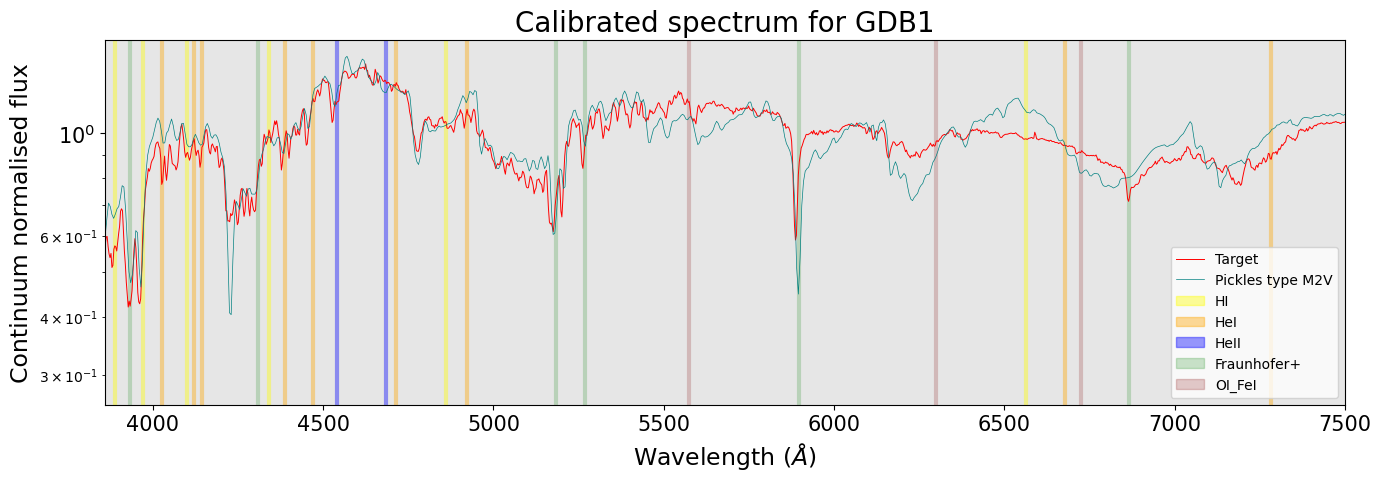

1
Cal_ZZ_GDB2.fits
Spectrum1D (length=1981)
flux:             [ 5.3604e-15 erg / (Angstrom cm2 s2), ..., 5.0483e-14 erg / (Angstrom cm2 s2) ],  mean=4.4536e-14 erg / (Angstrom cm2 s2)
spectral axis:    [ 3856.1 Angstrom, ..., 9431.8 Angstrom ],  mean=6643.9 Angstrom
s1_cal: [4.5314083e-10 4.3340598e-10 4.1334866e-10 ... 3.3828520e-09 3.2970853e-09
 3.2301379e-09] erg / (Angstrom cm2 s2)


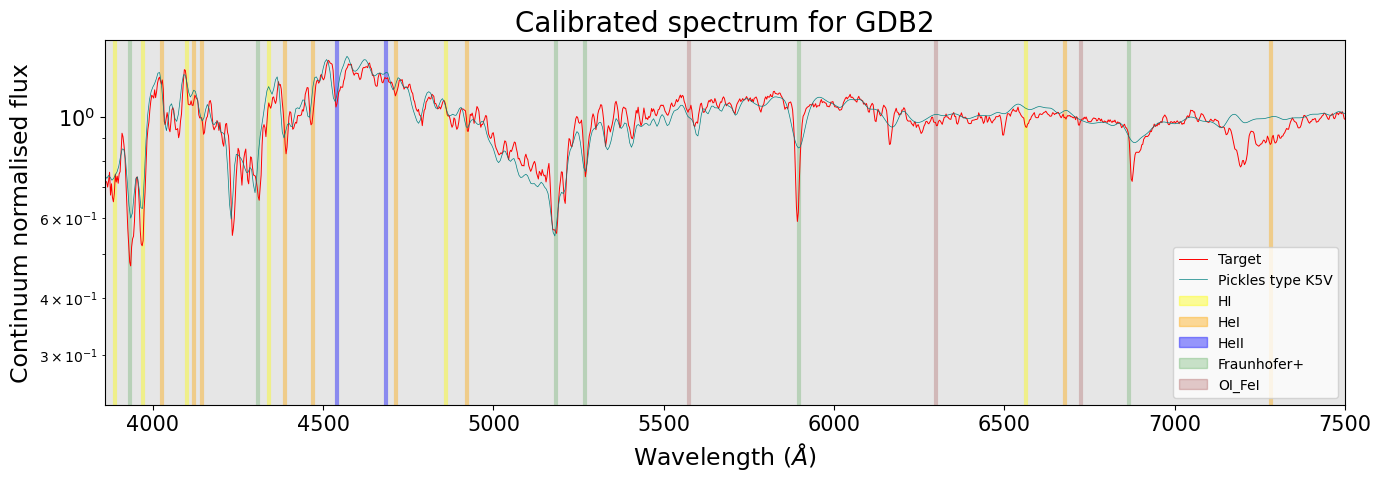

2
Cal_ZZ_GDB3.fits
Spectrum1D (length=1981)
flux:             [ 2.908e-16 erg / (Angstrom cm2 s2), ..., 1.2263e-15 erg / (Angstrom cm2 s2) ],  mean=1.1749e-15 erg / (Angstrom cm2 s2)
spectral axis:    [ 3855.6 Angstrom, ..., 9428.5 Angstrom ],  mean=6642.0 Angstrom
s1_cal: [7.0195189e-10 5.9517358e-10 5.6147498e-10 ... 3.0004399e-09 2.9048759e-09
 2.8130869e-09] erg / (Angstrom cm2 s2)


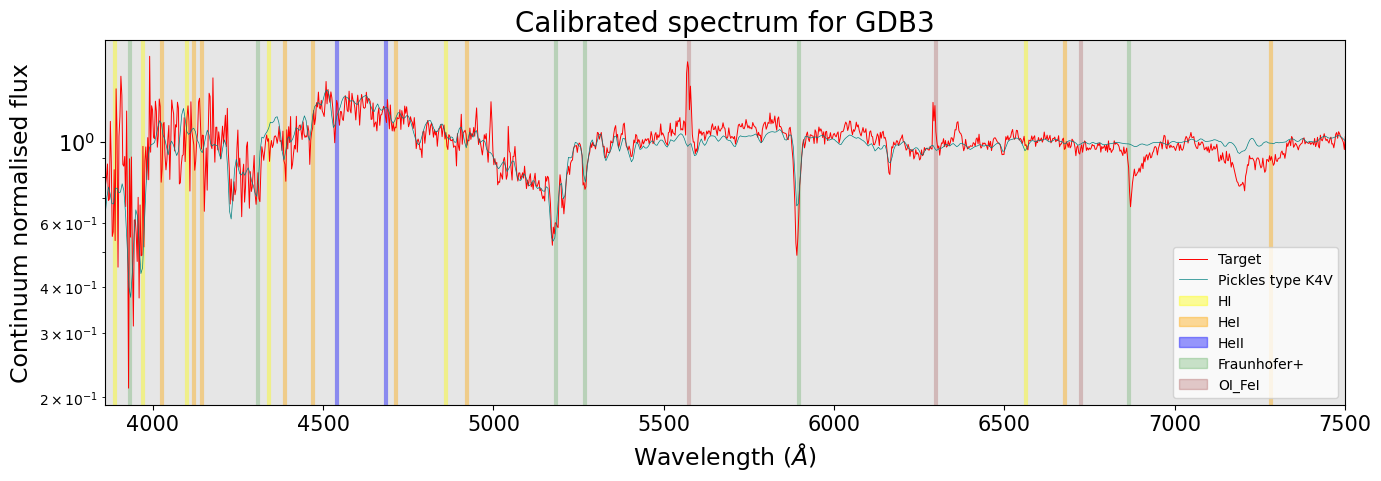

3
Cal_ZZ_GDB4.fits
Spectrum1D (length=1981)
flux:             [ 3.2298e-15 erg / (Angstrom cm2 s2), ..., 6.5841e-16 erg / (Angstrom cm2 s2) ],  mean=1.4585e-15 erg / (Angstrom cm2 s2)
spectral axis:    [ 3857.5 Angstrom, ..., 9421.5 Angstrom ],  mean=6639.5 Angstrom
s1_cal: [6.3352861e-09 6.8609789e-09 7.1147088e-09 ... 8.0574702e-10 7.8567886e-10
 7.7038853e-10] erg / (Angstrom cm2 s2)


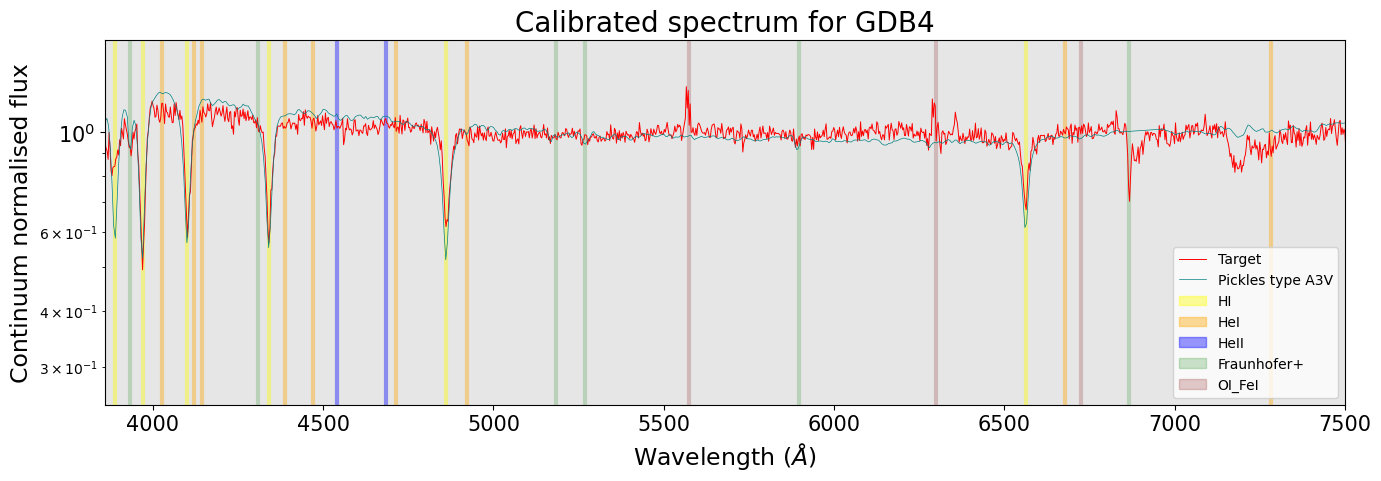

4
Cal_ZZ_GDB5.fits
Spectrum1D (length=1981)
flux:             [ 3.2598e-15 erg / (Angstrom cm2 s2), ..., 5.8552e-15 erg / (Angstrom cm2 s2) ],  mean=6.5085e-15 erg / (Angstrom cm2 s2)
spectral axis:    [ 3849.6 Angstrom, ..., 9431.9 Angstrom ],  mean=6640.7 Angstrom


s1_cal: [5.2351518e-10 5.1350302e-10 5.0576737e-10 ... 2.7490223e-09 2.6135312e-09
 2.5397353e-09] erg / (Angstrom cm2 s2)


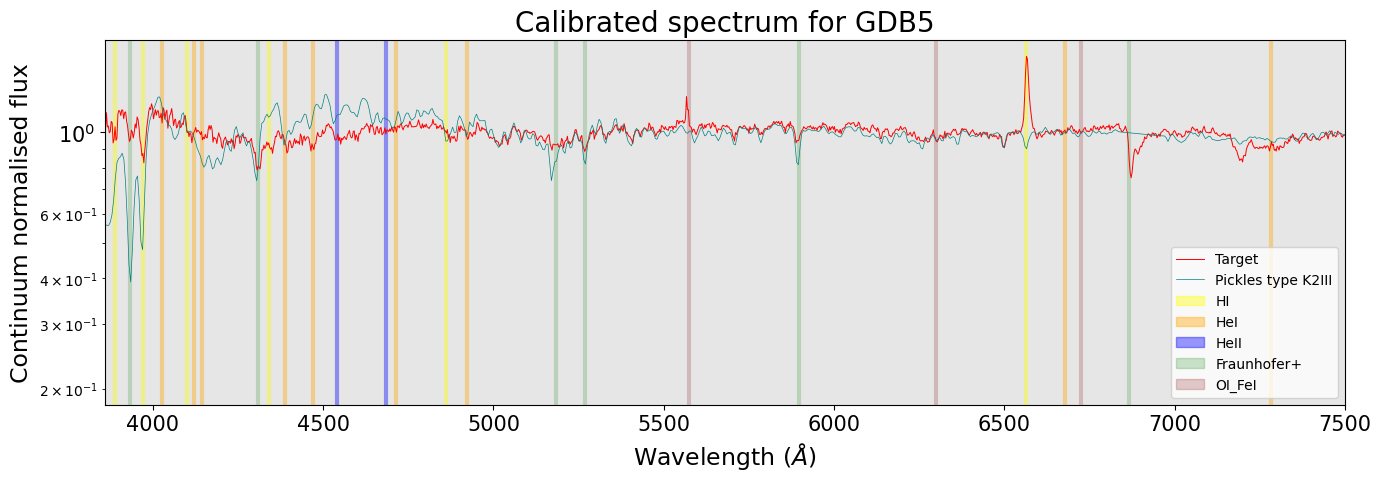

5
Cal_ZZ_GDB6.fits
Spectrum1D (length=1981)
flux:             [ 2.4135e-15 erg / (Angstrom cm2 s2), ..., 3.864e-16 erg / (Angstrom cm2 s2) ],  mean=9.8895e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3855.9 Angstrom, ..., 9435.9 Angstrom ],  mean=6645.9 Angstrom
s1_cal: [1.2881474e-08 1.3109511e-08 1.2989170e-08 ... 5.8442395e-10 5.7672056e-10
 5.5965016e-10] erg / (Angstrom cm2 s2)


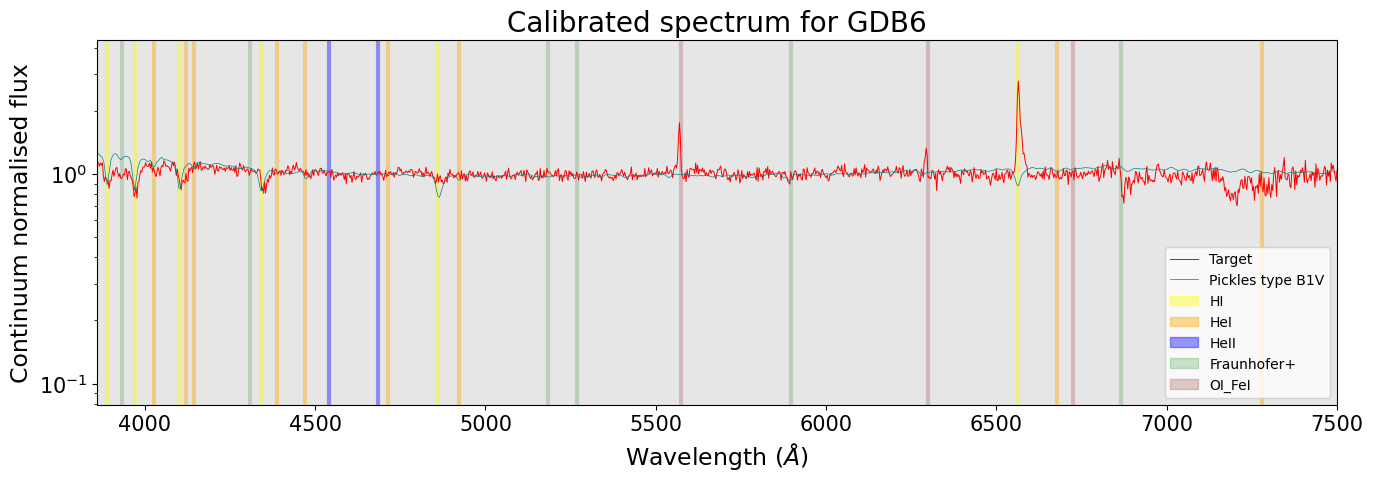

6
Cal_ZZ_GDB7.fits
Spectrum1D (length=1981)
flux:             [ 5.9846e-15 erg / (Angstrom cm2 s2), ..., 5.6511e-16 erg / (Angstrom cm2 s2) ],  mean=2.2071e-15 erg / (Angstrom cm2 s2)
spectral axis:    [ 3845.9 Angstrom, ..., 9431.6 Angstrom ],  mean=6638.7 Angstrom


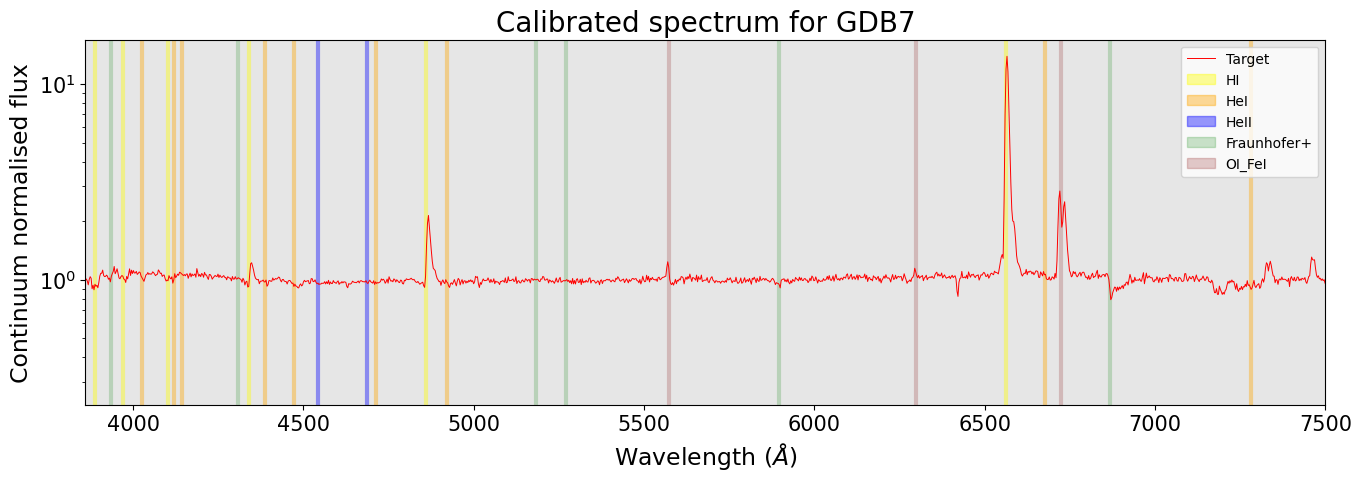

7
Cal_ZZ_GDB8.fits
Spectrum1D (length=1981)
flux:             [ 7.033e-15 erg / (Angstrom cm2 s2), ..., 5.7528e-16 erg / (Angstrom cm2 s2) ],  mean=2.1637e-15 erg / (Angstrom cm2 s2)
spectral axis:    [ 3853.9 Angstrom, ..., 9429.0 Angstrom ],  mean=6641.4 Angstrom


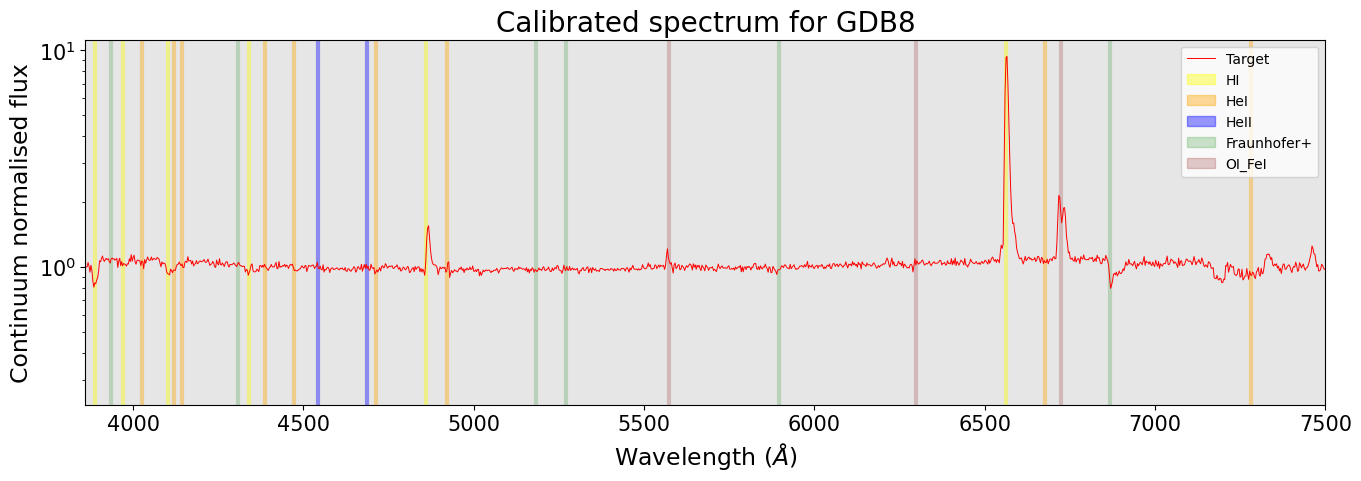

8
Cal_ZZ_GDB9.fits
Spectrum1D (length=1981)
flux:             [ 4.4025e-15 erg / (Angstrom cm2 s2), ..., 3.3822e-16 erg / (Angstrom cm2 s2) ],  mean=2.9925e-15 erg / (Angstrom cm2 s2)
spectral axis:    [ 3852.5 Angstrom, ..., 9428.3 Angstrom ],  mean=6640.4 Angstrom


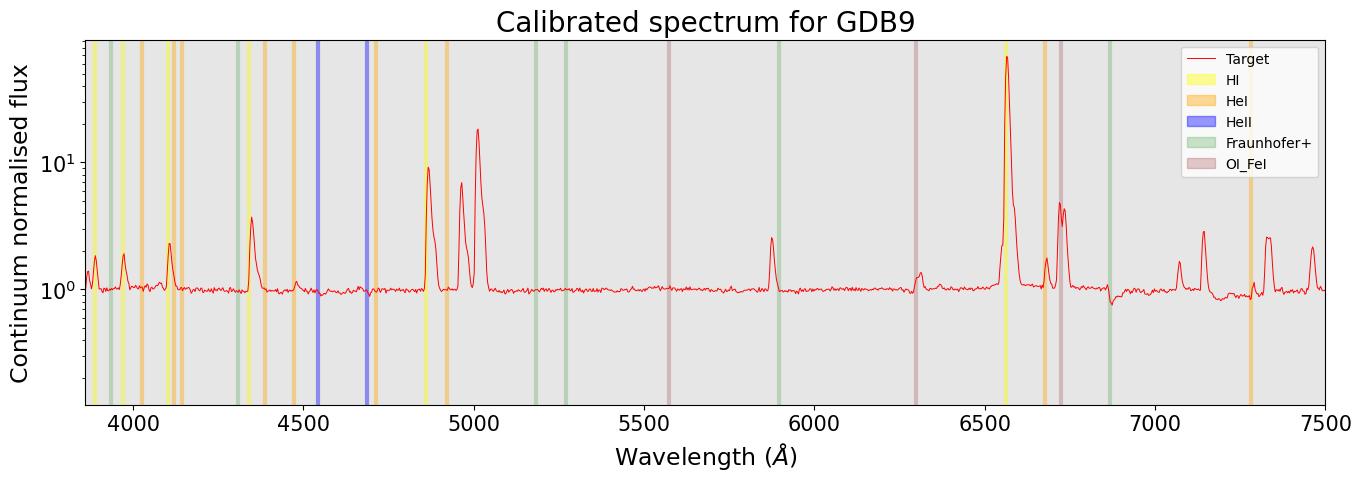

9
Cal_ZZ_GDB10.fits
Spectrum1D (length=1981)
flux:             [ 5.7454e-15 erg / (Angstrom cm2 s2), ..., 5.2827e-16 erg / (Angstrom cm2 s2) ],  mean=1.9298e-15 erg / (Angstrom cm2 s2)
spectral axis:    [ 3851.6 Angstrom, ..., 9425.9 Angstrom ],  mean=6638.7 Angstrom


s1_cal: [9.7689776e-09 1.0022476e-08 1.0038783e-08 ... 7.0767442e-10 6.9005740e-10
 6.6558847e-10] erg / (Angstrom cm2 s2)


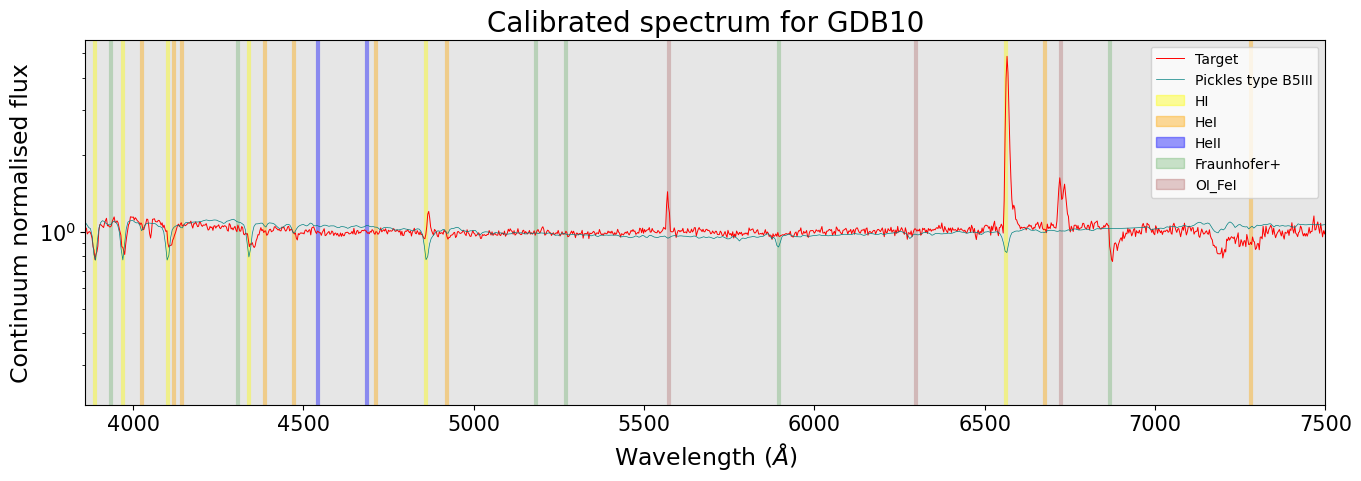

10
Cal_ZZ_GDB13.fits
Spectrum1D (length=1981)
flux:             [ 2.3833e-15 erg / (Angstrom cm2 s2), ..., 1.2151e-16 erg / (Angstrom cm2 s2) ],  mean=7.6226e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3852.7 Angstrom, ..., 9431.6 Angstrom ],  mean=6642.1 Angstrom
s1_cal: [8.7266541e-09 8.7796437e-09 8.7532532e-09 ... 8.8333074e-10 8.8051538e-10
 8.7164242e-10] erg / (Angstrom cm2 s2)


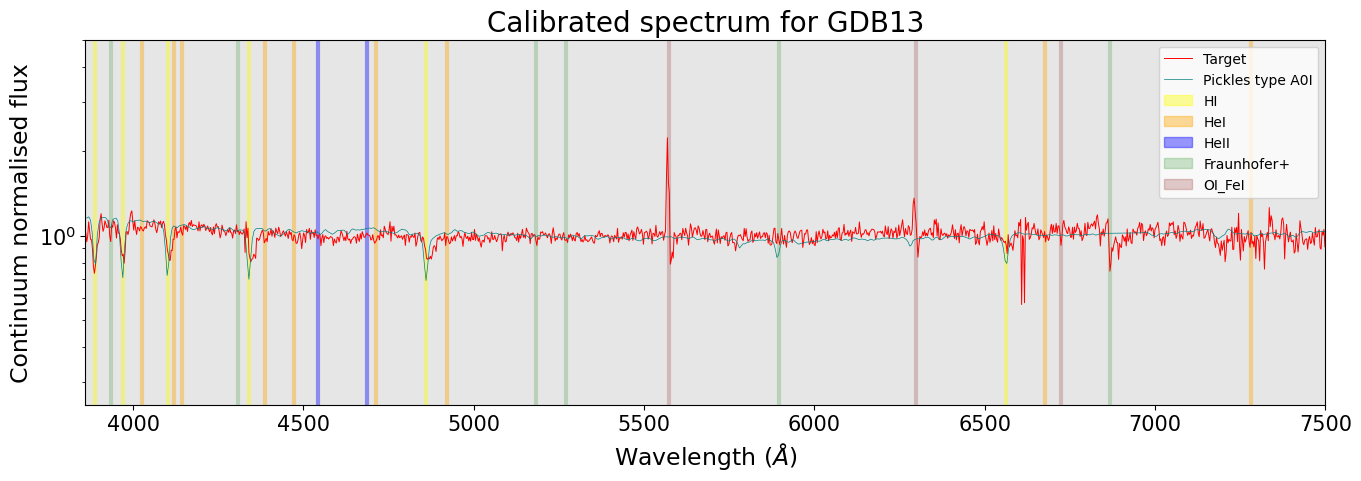

11
Cal_ZZ_GDB14.fits
Spectrum1D (length=1981)
flux:             [ 7.6987e-16 erg / (Angstrom cm2 s2), ..., 2.3455e-17 erg / (Angstrom cm2 s2) ],  mean=7.2664e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3841.3 Angstrom, ..., 9437.2 Angstrom ],  mean=6639.2 Angstrom


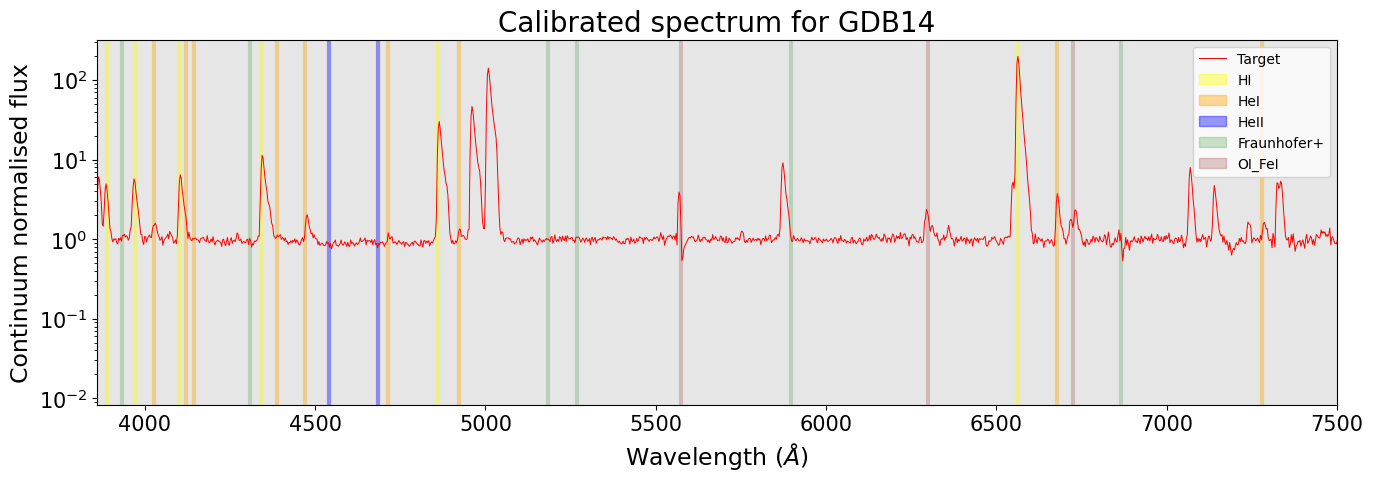

12
Cal_ZZ_GDB21.fits
Spectrum1D (length=1981)
flux:             [ 9.8629e-16 erg / (Angstrom cm2 s2), ..., 2.2636e-16 erg / (Angstrom cm2 s2) ],  mean=3.2946e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3848.4 Angstrom, ..., 9425.0 Angstrom ],  mean=6636.7 Angstrom
s1_cal: [1.0612915e-08 1.0621923e-08 1.0580438e-08 ... 6.2490108e-10 6.0224209e-10
 5.8621269e-10] erg / (Angstrom cm2 s2)


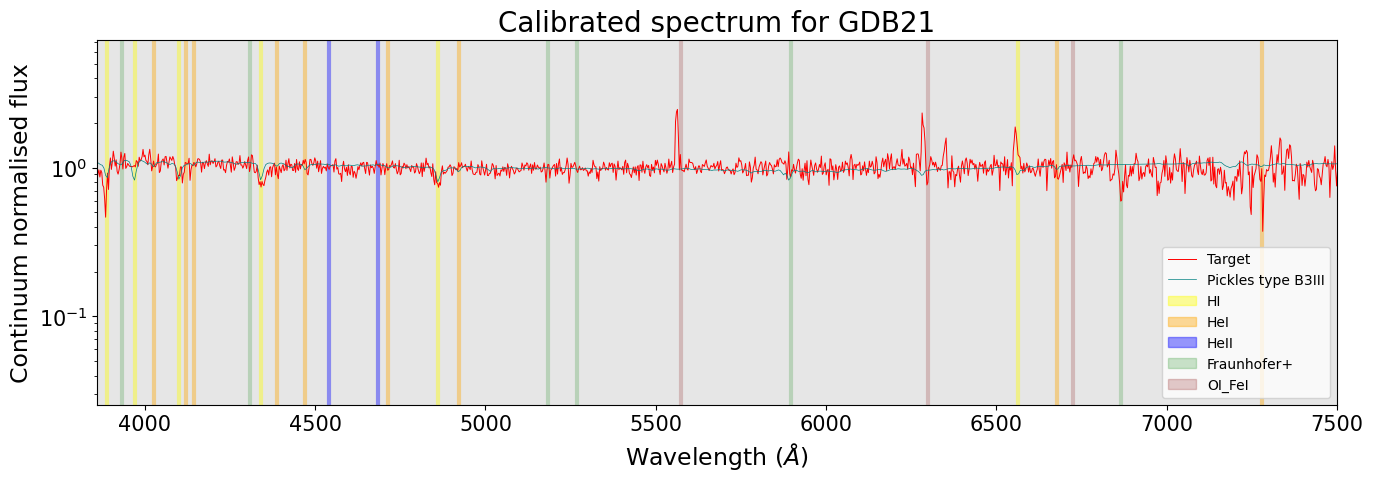

13
Cal_ZZ_GDB23.fits
Spectrum1D (length=1981)
flux:             [ 7.7235e-16 erg / (Angstrom cm2 s2), ..., 7.0166e-17 erg / (Angstrom cm2 s2) ],  mean=2.921e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3847.1 Angstrom, ..., 9427.1 Angstrom ],  mean=6637.1 Angstrom
s1_cal: [1.0132342e-08 1.0520693e-08 1.0738688e-08 ... 6.8860923e-10 6.7613642e-10
 6.6542249e-10] erg / (Angstrom cm2 s2)


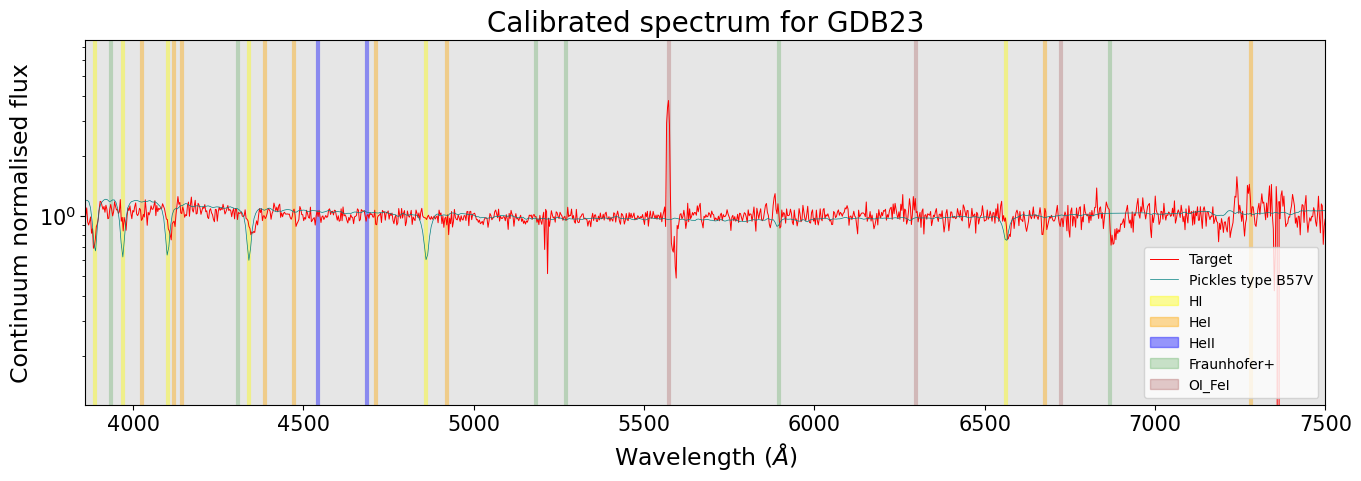

14
Cal_ZZ_GDB25.fits
Spectrum1D (length=1981)
flux:             [ 1.4385e-16 erg / (Angstrom cm2 s2), ..., 2.3244e-16 erg / (Angstrom cm2 s2) ],  mean=2.4381e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3842.0 Angstrom, ..., 9429.2 Angstrom ],  mean=6635.6 Angstrom


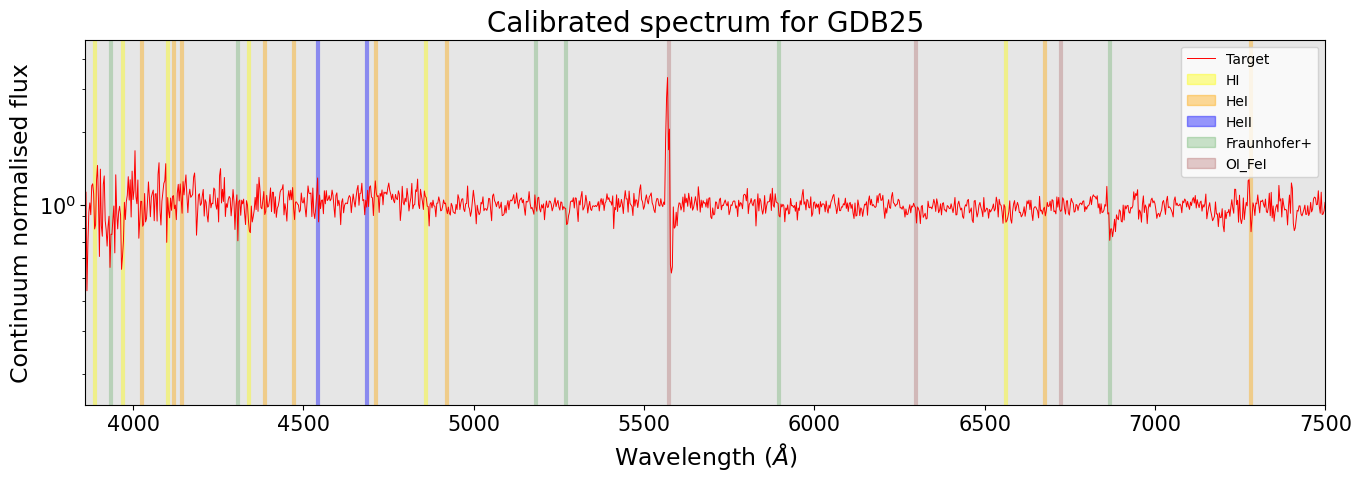

15
Cal_ZZ_GDB27.fits
Spectrum1D (length=1981)
flux:             [ 3.2382e-16 erg / (Angstrom cm2 s2), ..., 1.0183e-16 erg / (Angstrom cm2 s2) ],  mean=1.7917e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3844.6 Angstrom, ..., 9429.4 Angstrom ],  mean=6637.0 Angstrom


s1_cal: [4.5661213e-09 4.7966240e-09 4.9462230e-09 ... 1.2614000e-09 1.2605444e-09
 1.2285766e-09] erg / (Angstrom cm2 s2)


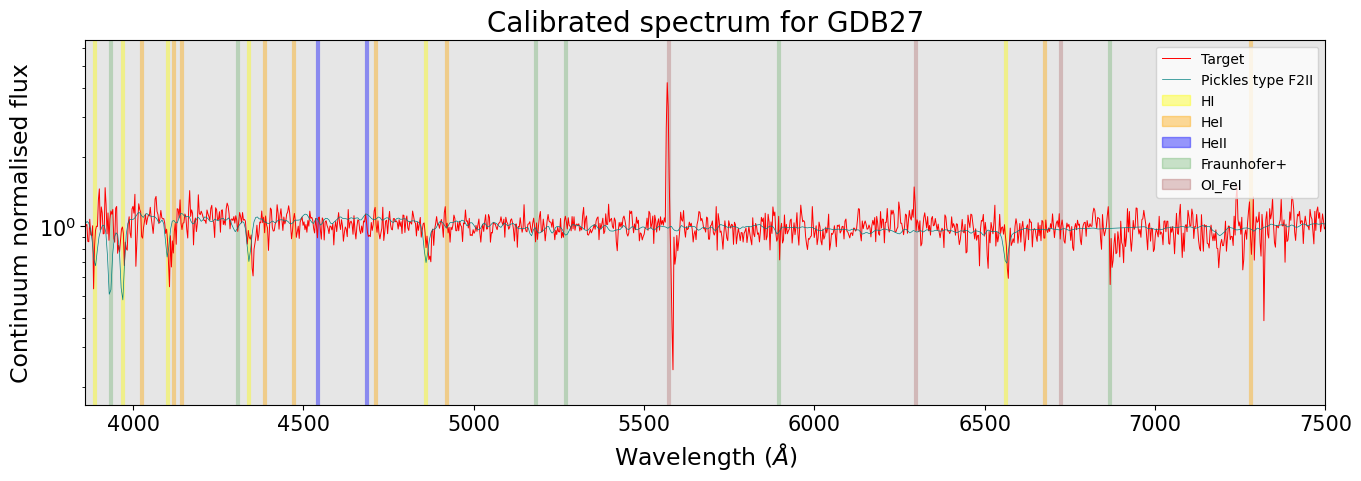

16
Cal_ZZ_GDB30.fits
Spectrum1D (length=1981)
flux:             [ 9.7541e-16 erg / (Angstrom cm2 s2), ..., 1.2565e-16 erg / (Angstrom cm2 s2) ],  mean=4.0518e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3841.7 Angstrom, ..., 9430.8 Angstrom ],  mean=6636.2 Angstrom
s1_cal: [6.7925257e-09 7.2395094e-09 7.5022815e-09 ... 8.9034613e-10 8.8850832e-10
 8.6279106e-10] erg / (Angstrom cm2 s2)


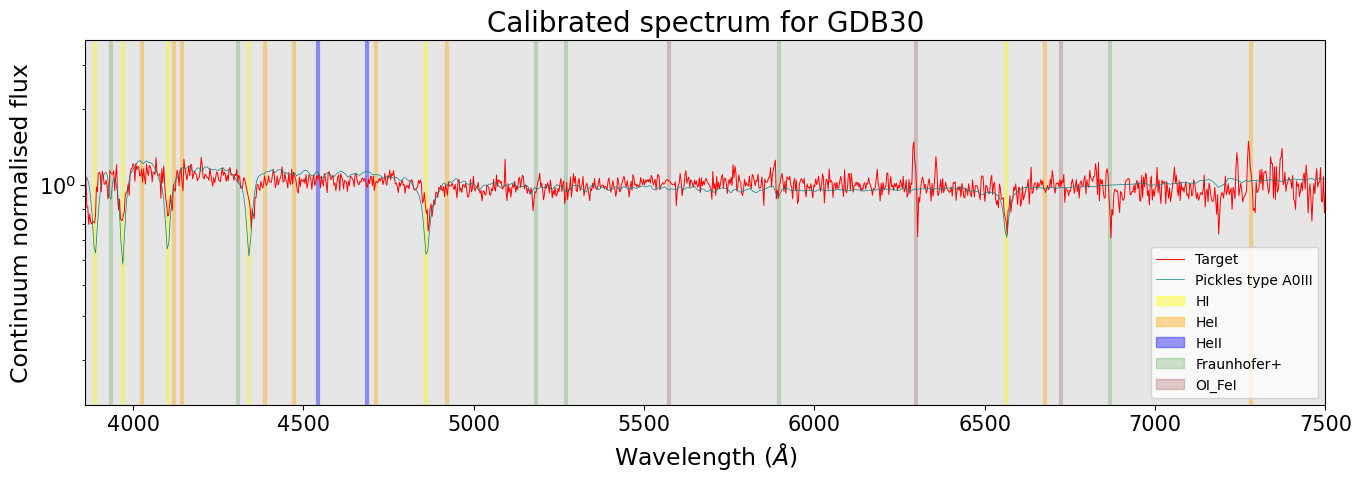

17
Cal_ZZ_GDB32.fits
Spectrum1D (length=1981)
flux:             [ 8.0806e-17 erg / (Angstrom cm2 s2), ..., 1.8926e-16 erg / (Angstrom cm2 s2) ],  mean=2.0709e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3841.7 Angstrom, ..., 9431.0 Angstrom ],  mean=6636.3 Angstrom
s1_cal: [4.7177673e-10 4.6773646e-10 4.6010298e-10 ... 2.4247804e-09 2.3661788e-09
 2.3242912e-09] erg / (Angstrom cm2 s2)


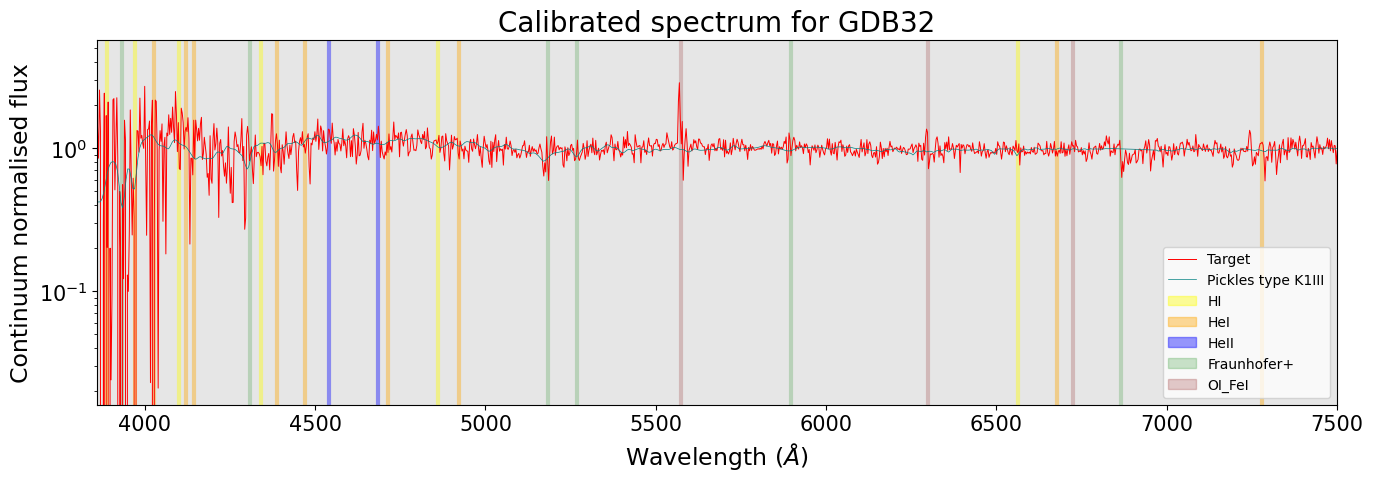

18
Cal_ZZ_GDB34.fits
Spectrum1D (length=1981)
flux:             [ 4.2408e-16 erg / (Angstrom cm2 s2), ..., 9.2988e-17 erg / (Angstrom cm2 s2) ],  mean=1.7672e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3841.7 Angstrom, ..., 9424.9 Angstrom ],  mean=6633.3 Angstrom


s1_cal: [9.038777e-09 8.923977e-09 8.770770e-09 ... 8.427277e-10 8.235217e-10
 7.991252e-10] erg / (Angstrom cm2 s2)


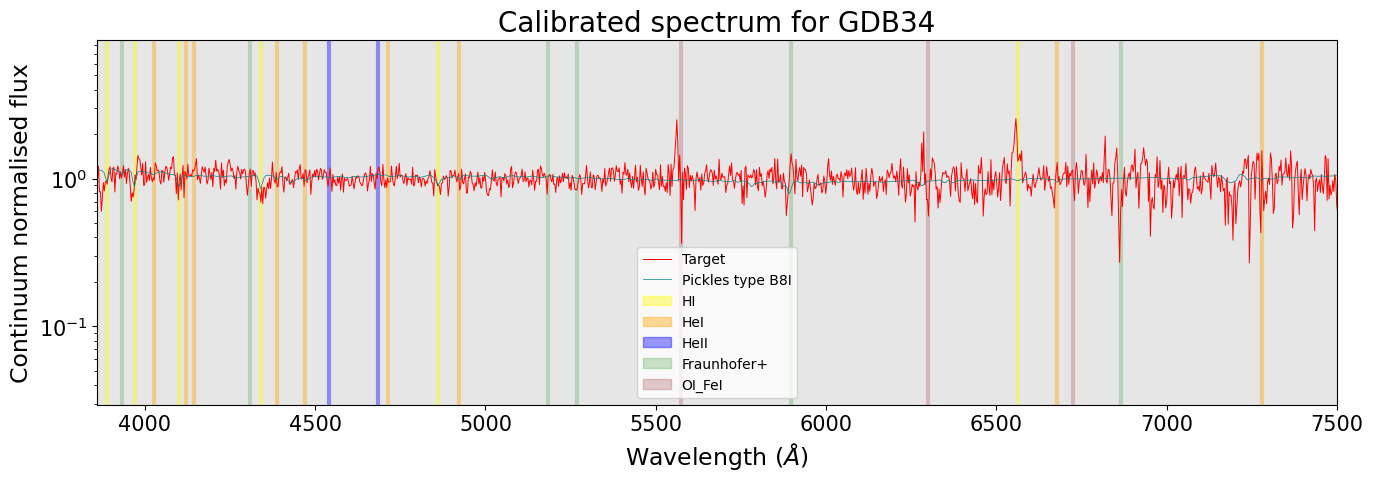

19
Cal_ZZ_GDB37.fits
Spectrum1D (length=1981)
flux:             [ 1.0768e-16 erg / (Angstrom cm2 s2), ..., 9.4078e-17 erg / (Angstrom cm2 s2) ],  mean=1.5491e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3851.2 Angstrom, ..., 9436.8 Angstrom ],  mean=6644.0 Angstrom


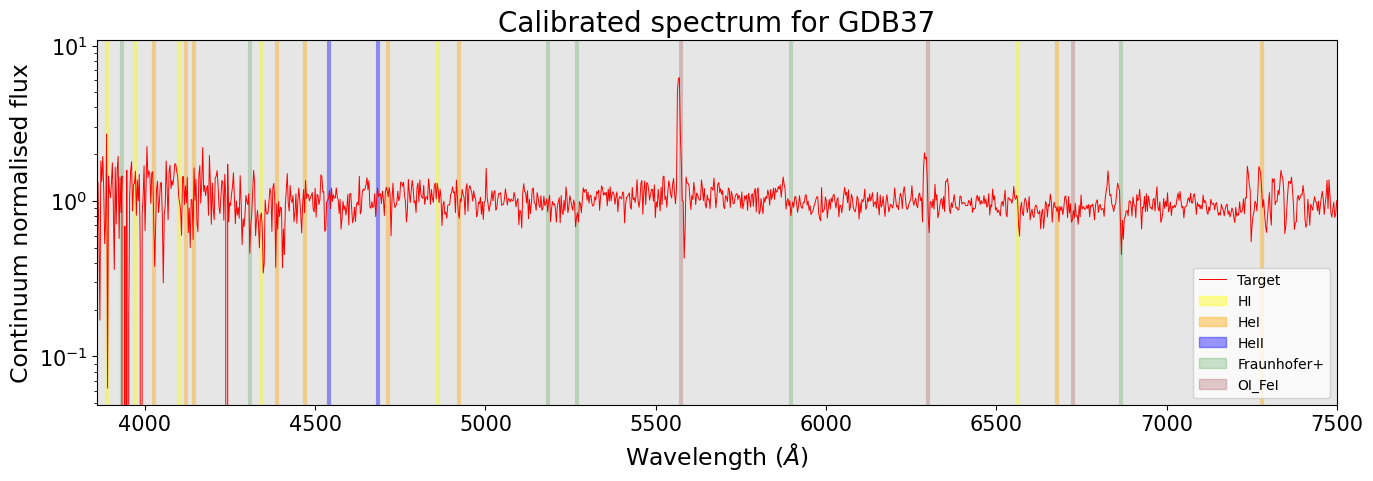

20
Cal_ZZ_GDB38.fits
Spectrum1D (length=1981)
flux:             [ 3.5379e-16 erg / (Angstrom cm2 s2), ..., 2.129e-17 erg / (Angstrom cm2 s2) ],  mean=3.7365e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3836.3 Angstrom, ..., 9438.5 Angstrom ],  mean=6637.4 Angstrom


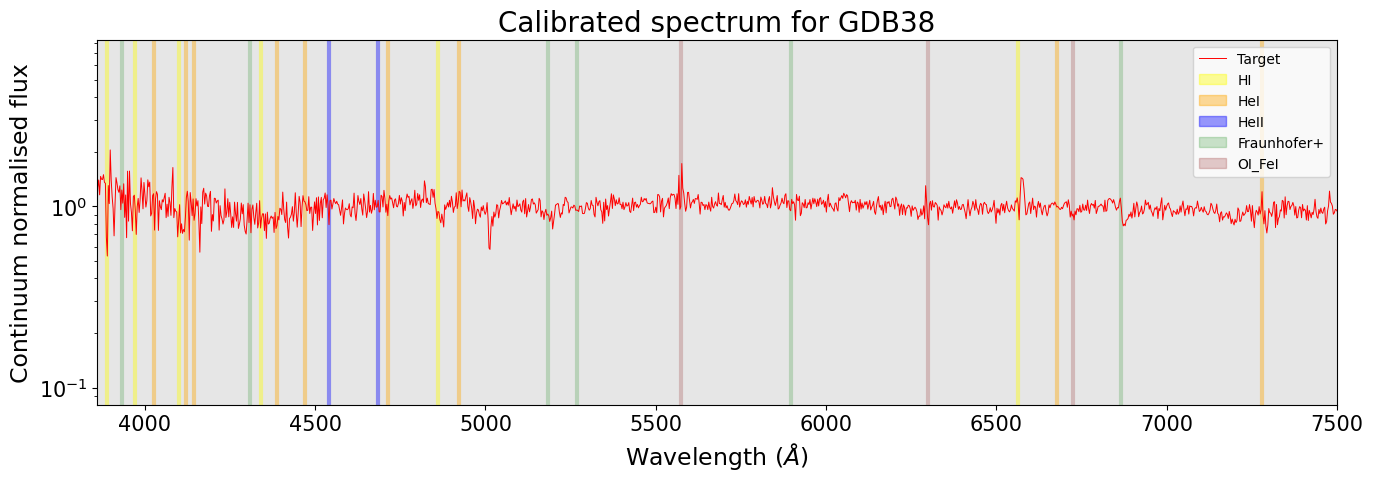

21
Cal_ZZ_GDB40.fits
Spectrum1D (length=1981)
flux:             [ 2.1493e-16 erg / (Angstrom cm2 s2), ..., 7.5315e-17 erg / (Angstrom cm2 s2) ],  mean=8.5836e-17 erg / (Angstrom cm2 s2)
spectral axis:    [ 3836.6 Angstrom, ..., 9432.6 Angstrom ],  mean=6634.6 Angstrom


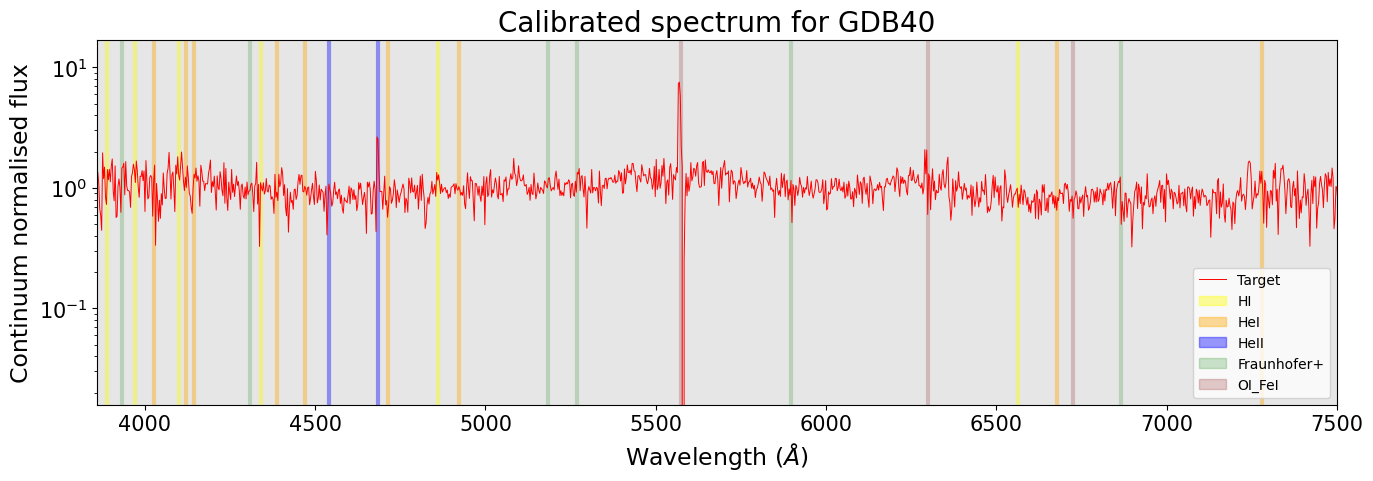

22
Cal_ZZ_GDB41.fits
Spectrum1D (length=1981)
flux:             [ 6.0859e-16 erg / (Angstrom cm2 s2), ..., 3.5526e-16 erg / (Angstrom cm2 s2) ],  mean=5.3181e-16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3829.7 Angstrom, ..., 9436.2 Angstrom ],  mean=6632.9 Angstrom
s1_cal: [3.0079350e-09 3.0290874e-09 3.0268179e-09 ... 1.5723689e-09 1.5428010e-09
 1.5282180e-09] erg / (Angstrom cm2 s2)


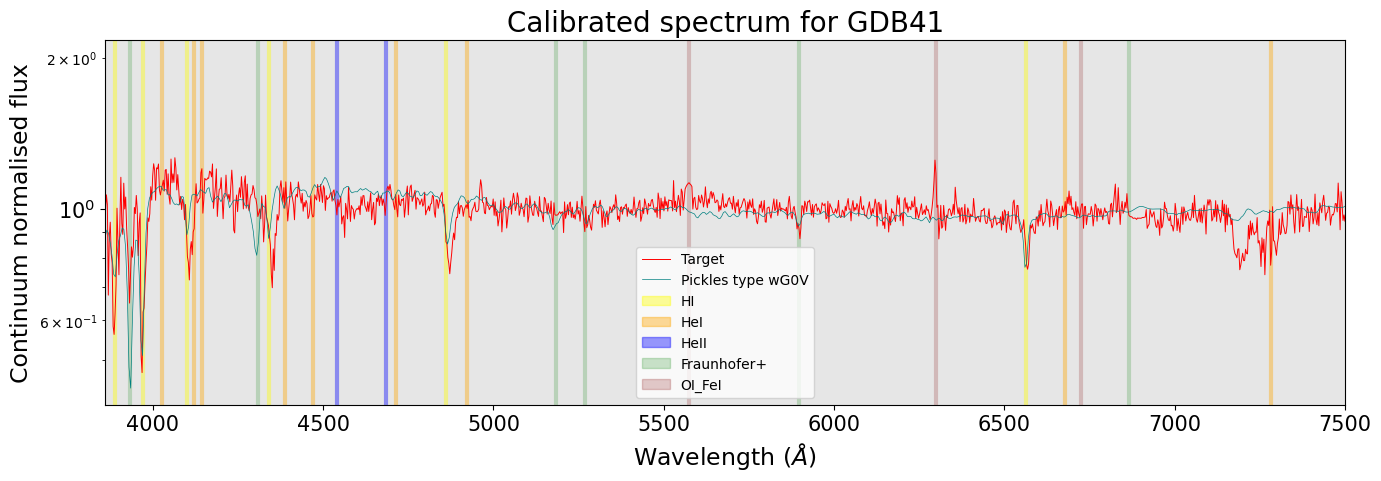

23
Cal_ZZ_LTT1020_21112023.fits
Spectrum1D (length=1981)
flux:             [ 7.839e-14 erg / (Angstrom cm2 s2), ..., 3.1055e-14 erg / (Angstrom cm2 s2) ],  mean=7.3269e-14 erg / (Angstrom cm2 s2)
spectral axis:    [ 3854.7 Angstrom, ..., 9418.7 Angstrom ],  mean=6636.7 Angstrom
s1_cal: [2.2050519e-09 2.1211588e-09 2.0420077e-09 ... 1.7459250e-09 1.7308933e-09
 1.7262403e-09] erg / (Angstrom cm2 s2)


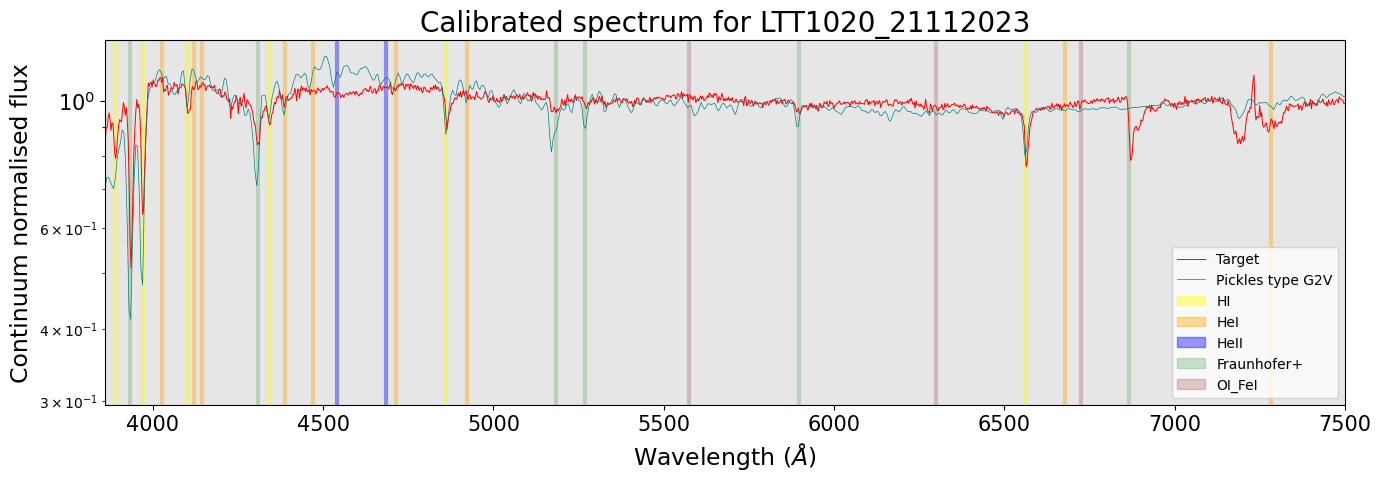

merges happened



In [6]:

#Get the pdf merger ready for later
merger = PdfMerger()
Merge_files=[]

# Load data from CSV for the line locations to identify HI, HeI and HeII with
f_lines=open("Be_line_list(copy).txt", "r")

Be_name= []
Be_line= []
Be_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    Be_name.append(row_data[0])
    Be_line.append(float(row_data[1]))
    Be_color.append(row_data[2])
f_lines.close()

# Load data from CSV for the Fraunhofer lines
f_lines=open("Be_Fraunhofer_line_list.txt", "r")

FH_name= []
FH_line= []
FH_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    FH_name.append(row_data[0])
    FH_line.append(float(row_data[1]))
    FH_color.append(row_data[2])
f_lines.close()

f = open("all.csv", "r")
f_c = open("My_cal_files.csv", "r")

# Instansiate lists for file names of unclaibrated (files) and calibrated (files_cali) files.
files=[]
files_cali=[]

# Read first line for files and populate list
line=f.readline()
while line!='':
    files.append(line[0:-1])
    line=f.readline()
f.close()

# Read first line for files_cali and populate list
line=f_c.readline()
Smooth_Fac=[]
pickles_Match=[]
pickles_Type=[]
label_Y=[]
while line!='':
    row_data = line.strip("\n").split(',')
    
    files_cali.append(row_data[0])
    Smooth_Fac.append(row_data[1])
    pickles_Match.append(row_data[2])
    pickles_Type.append(row_data[3])
    label_Y.append(row_data[4])
    line=f_c.readline()
f_c.close()

for i in range(0,len(files)):
    print(i)
    #get the spectrum data from fits file from list of fits files
    name=files_cali[i]
    
    fig=plt.figure(figsize=(16, 5)) #create the figure

    ax = fig.add_subplot(1, 1, 1) #this is for background color formating
    ax.set_facecolor((0.90, 0.90, 0.90))
    
    plt.xlim(left=3860,right=7500) #Set x axis limits, max to 7500 if wish is to cut off section with no identifyable lines due to high noise
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    
    #plot the lines for ID Hydrogen and Helium lines
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for j in range(0,len(Be_line)):

        plt.axvline(x = Be_line[j], color = Be_color[j], linewidth=3, alpha=0.4)

    #plot the lines for ID Fraunhofer lines

    for j in range(0,len(FH_line)):

        plt.axvline(x = FH_line[j], color = FH_color[j], linewidth=3, alpha=0.2)

    #Plot the calibrated spectra
    My_Plot=Plot_Cont_Norm_MrKT(name)
    
    #Plot the pickles spectrum if matched to one:
    if(pickles_Match[i]!=''):
        Pickles_Plot=Plot_Cont_Norm_Pic(pickles_Match[i])
    
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.xlabel('Wavelength ($\AA$)', fontsize=17)
    plt.ylabel('Continuum normalised flux', fontsize=17)
    

    HydrogenI_patch = mpatches.Patch(color='yellow',alpha=0.4, label='HI')
    HeliumI_patch = mpatches.Patch(color='orange',alpha=0.4, label='HeI')
    HeliumII_patch = mpatches.Patch(color='blue',alpha=0.4, label='HeII')
    Fraunhofer_patch = mpatches.Patch(color='green',alpha=0.2, label='Fraunhofer+')
    FeO_patch = mpatches.Patch(color='maroon',alpha=0.2, label='OI_FeI')
    
    handles.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    labels.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])

    plt.legend(handles=handles,loc='best')
    plt.subplots_adjust(bottom=0.15) #Because the plt.savefig crops the bottom for some reason.
    
    
    plt.yscale("log") #set y scale to log to correctly display the spectra

    plt.title("Calibrated spectrum for "+str(name[7:-5]), size=20)
    plt.autoscale(axis='y')
    
    Merge_files.append("./spectra_pdfs_TEST/"+str(name[7:-5])+'.pdf')
    
    plt.savefig(r"./spectra_pdfs_TEST/"+str(name[7:-5])+'.pdf', dpi=1600, orientation='landscape')
    plt.show()
    plt.close()
    
#     break

# now merge all pdfs into one pdf for conveniece
for pdf in Merge_files:
    merger.append(pdf)
merger.write("./spectra_pdfs_TEST/"+'All_Spectra.pdf')
merger.close()
print("merges happened")
   
print()